Training and evaluating K-Nearest Neighbors...
Fold 1 Accuracy: 0.9354207436399217
Fold 1 F1 Score: 0.0
Fold 2 Accuracy: 0.9432485322896281
Fold 2 F1 Score: 0.03333333333333334
Fold 3 Accuracy: 0.958904109589041
Fold 3 F1 Score: 0.045454545454545456
Fold 4 Accuracy: 0.9383561643835616
Fold 4 F1 Score: 0.03076923076923077
Fold 5 Accuracy: 0.9540117416829745
Fold 5 F1 Score: 0.04081632653061224
Mean Accuracy: 0.9459882583170254
Mean F1 Score: 0.03007468721754436


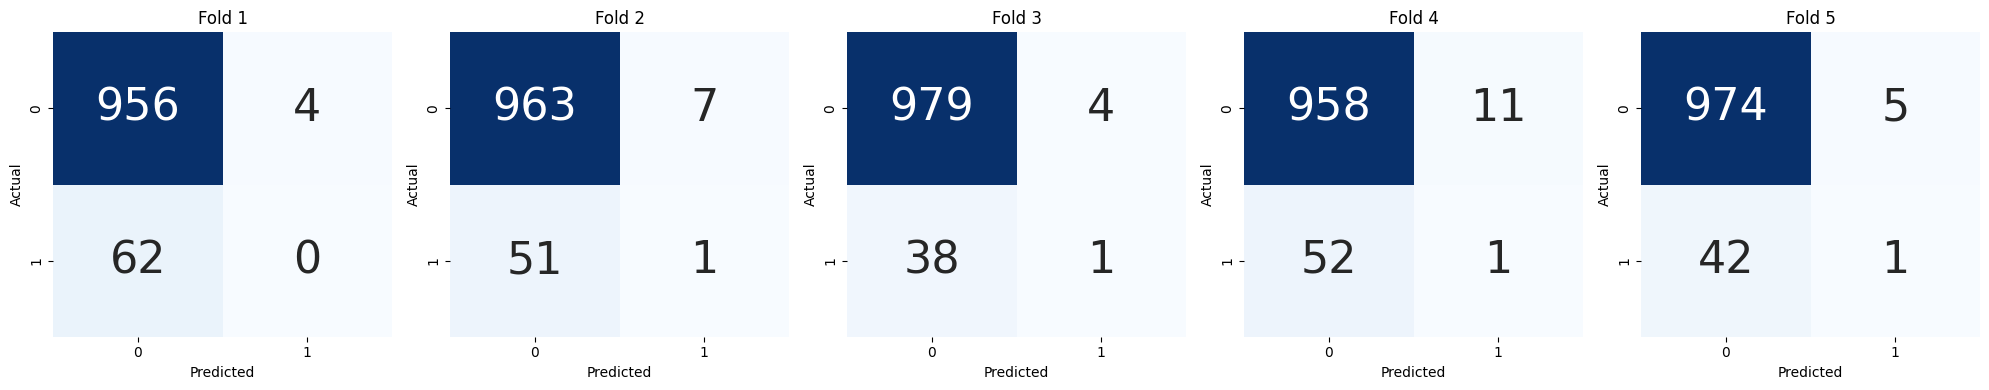

Training and evaluating Logistic Regression...
Fold 1 Accuracy: 0.9393346379647749
Fold 1 F1 Score: 0.0
Fold 2 Accuracy: 0.9500978473581213
Fold 2 F1 Score: 0.03773584905660378
Fold 3 Accuracy: 0.961839530332681
Fold 3 F1 Score: 0.0
Fold 4 Accuracy: 0.9481409001956947
Fold 4 F1 Score: 0.0
Fold 5 Accuracy: 0.9579256360078278
Fold 5 F1 Score: 0.0
Mean Accuracy: 0.9514677103718199
Mean F1 Score: 0.007547169811320756


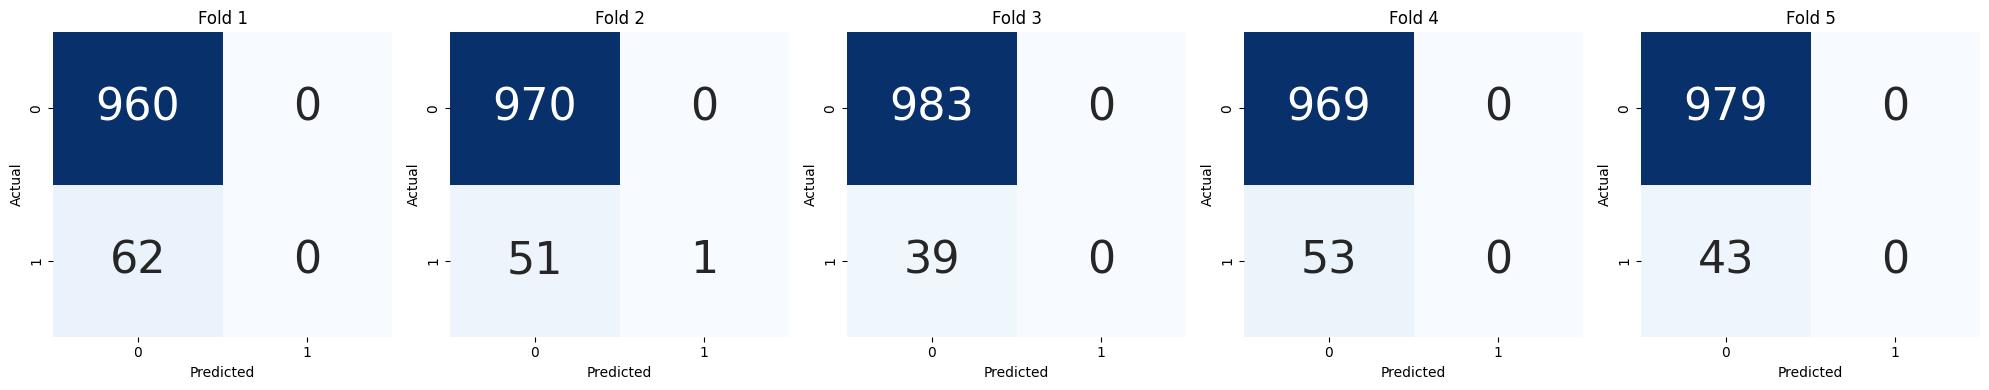

Training and evaluating Decision Tree...
Fold 1 Accuracy: 0.9070450097847358
Fold 1 F1 Score: 0.20168067226890754
Fold 2 Accuracy: 0.9168297455968689
Fold 2 F1 Score: 0.23423423423423426
Fold 3 Accuracy: 0.9217221135029354
Fold 3 F1 Score: 0.14893617021276595
Fold 4 Accuracy: 0.9021526418786693
Fold 4 F1 Score: 0.09090909090909091
Fold 5 Accuracy: 0.9070450097847358
Fold 5 F1 Score: 0.12844036697247704
Mean Accuracy: 0.9109589041095891
Mean F1 Score: 0.16084010691949516


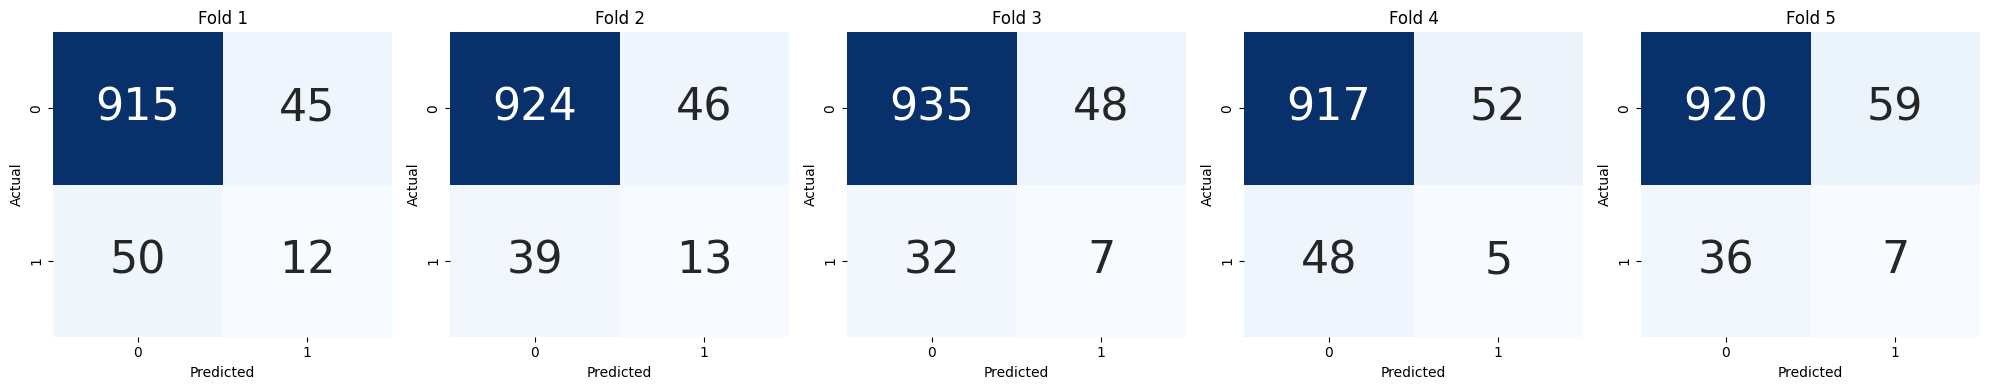

Training and evaluating Random Forest...
Fold 1 Accuracy: 0.9393346379647749
Fold 1 F1 Score: 0.03125
Fold 2 Accuracy: 0.949119373776908
Fold 2 F1 Score: 0.0
Fold 3 Accuracy: 0.9608610567514677
Fold 3 F1 Score: 0.047619047619047616
Fold 4 Accuracy: 0.9452054794520548
Fold 4 F1 Score: 0.034482758620689655
Fold 5 Accuracy: 0.9559686888454012
Fold 5 F1 Score: 0.0425531914893617
Mean Accuracy: 0.9500978473581213
Mean F1 Score: 0.031180999545819793


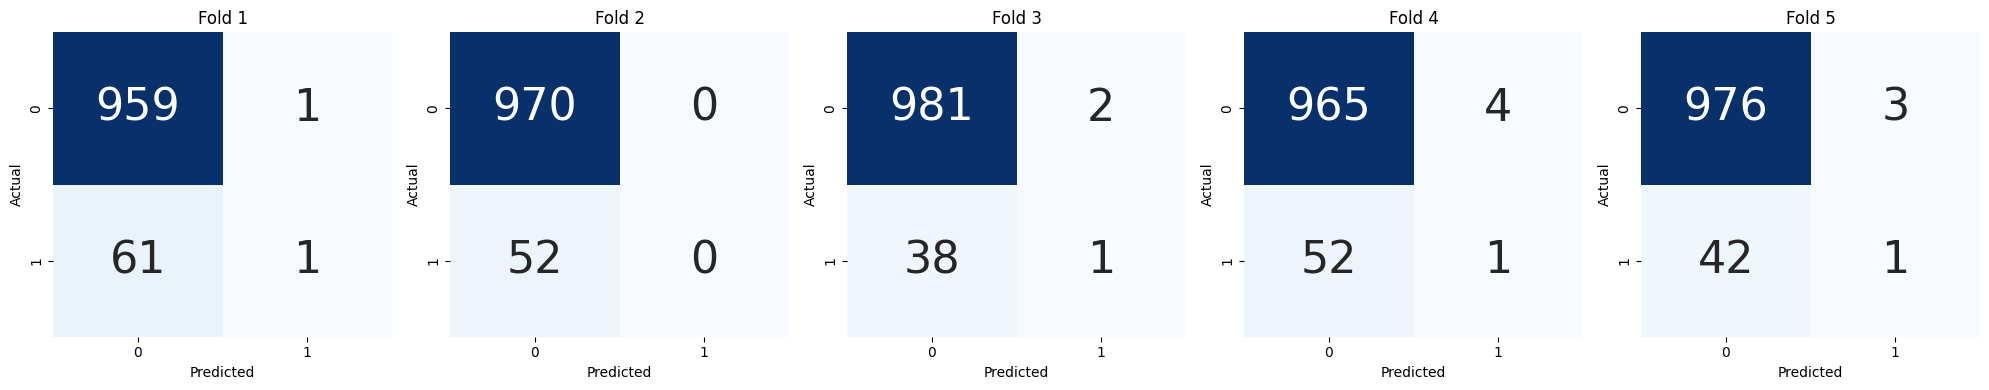

In [1]:
#처음 4개 모델 훈련 코드

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv("pre_info2.csv")

# 'id' 열 제거
data = data.drop(columns=['id'])

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data, drop_first=True)

# 독립 변수와 종속 변수를 분리합니다.
X = data.drop(columns=['stroke'])
y = data['stroke']

# KFold 객체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델들 정의
models = [
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]

# 각 모델별로 학습, 평가 수행
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracies = []
    f1_scores = []
    conf_matrices = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 모델 훈련
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 정확도 및 F1 점수 계산 및 저장
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1_scores.append(f1)

        # 혼동 행렬 계산 및 저장
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)

    # 각 fold에서의 정확도 및 F1 점수 출력
    for i, (accuracy, f1) in enumerate(zip(accuracies, f1_scores)):
        print(f"Fold {i+1} Accuracy: {accuracy}")
        print(f"Fold {i+1} F1 Score: {f1}")

    # 최종 평균 정확도 및 F1 점수 출력
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    print(f"Mean F1 Score: {np.mean(f1_scores)}")

    # 혼동 행렬 시각화
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, cm in enumerate(conf_matrices):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False, annot_kws={"size": 32})
        axes[i].set_title(f'Fold {i+1}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


<ipython-input-2-8db04b4496d8>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


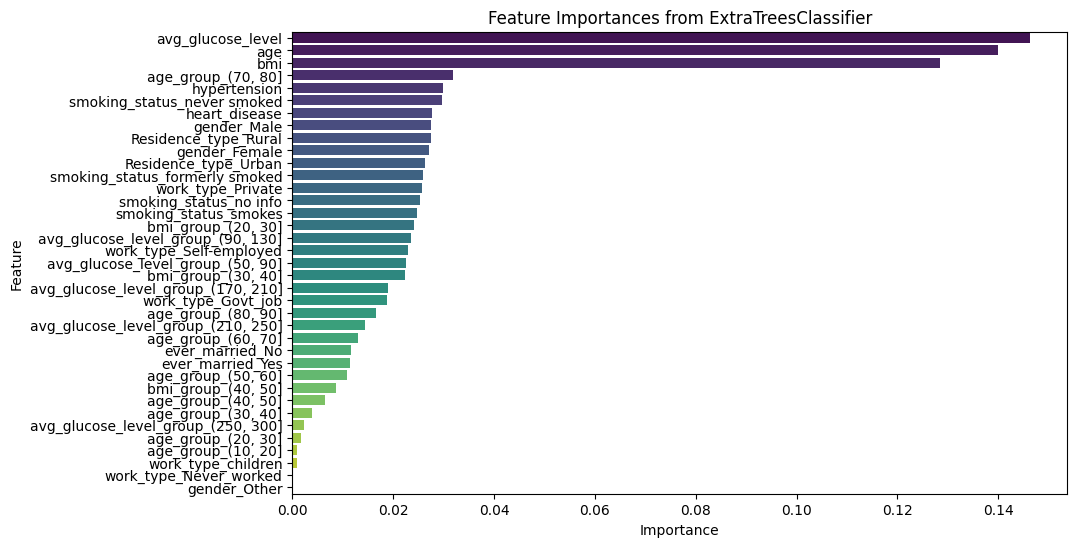

In [2]:
# 데이터 분석 코드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# 데이터 불러오기
data = pd.read_csv("pre_info2.csv")

# 'id' 열 제거
data = data.drop(columns=['id'])

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data, drop_first=True)

# 독립 변수와 종속 변수를 분리합니다.
X = data.drop(columns=['stroke'])
y = data['stroke']

# 데이터를 훈련 세트와 테스트 세트로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ExtraTreesClassifier 모델 초기화
model = ExtraTreesClassifier(random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X.columns

# 특징 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 중요도에 따라 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from ExtraTreesClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training and evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold 1 Accuracy: 0.9315068493150684
Fold 1 F1 Score: 0.10256410256410256
Fold 2 Accuracy: 0.9256360078277887
Fold 2 F1 Score: 0.15555555555555556
Fold 3 Accuracy: 0.952054794520548
Fold 3 F1 Score: 0.2898550724637681
Fold 4 Accuracy: 0.9178082191780822
Fold 4 F1 Score: 0.125
Fold 5 Accuracy: 0.9305283757338552
Fold 5 F1 Score: 0.14457831325301204
Mean Accuracy: 0.9315068493150684
Mean F1 Score: 0.16351060876728765


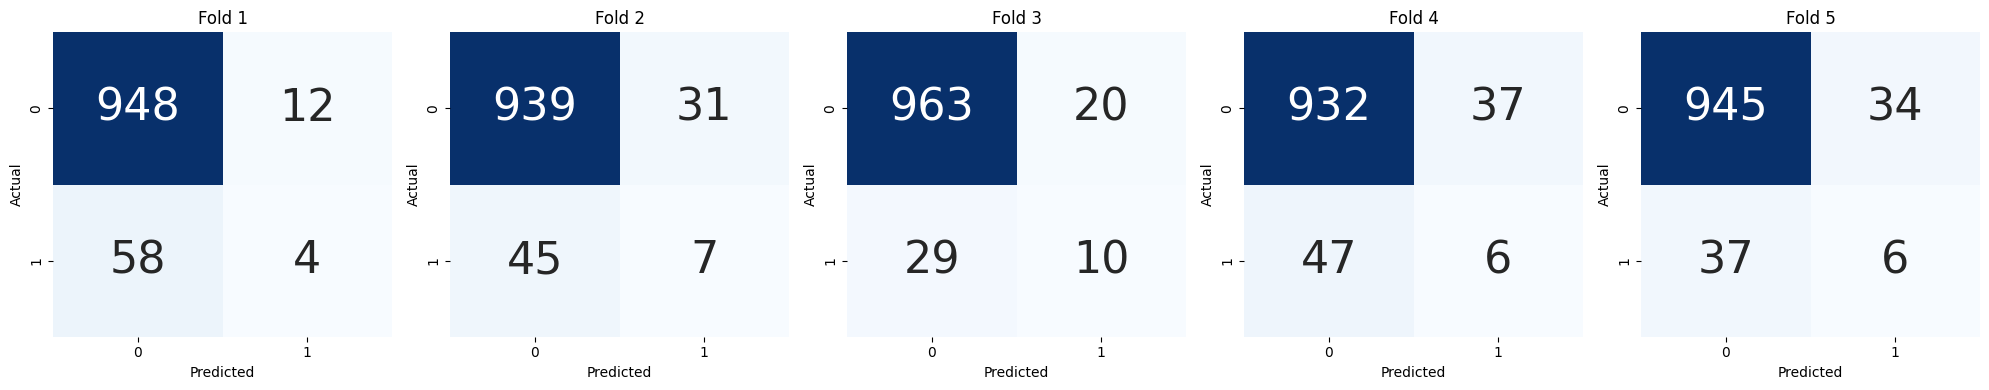

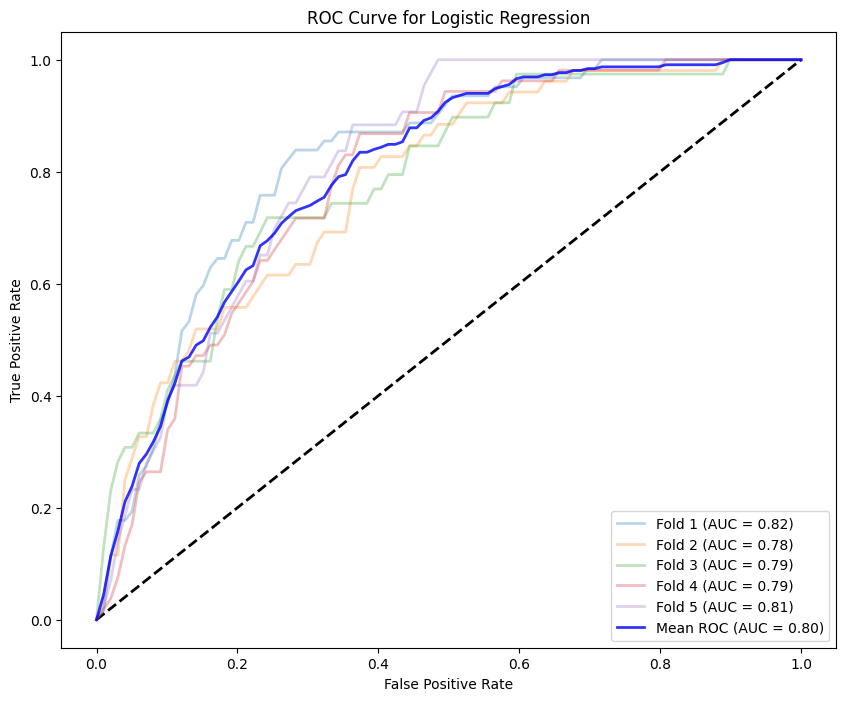

Training and evaluating SVM...
Fold 1 Accuracy: 0.9305283757338552
Fold 1 F1 Score: 0.0
Fold 2 Accuracy: 0.9305283757338552
Fold 2 F1 Score: 0.05333333333333333
Fold 3 Accuracy: 0.9422700587084148
Fold 3 F1 Score: 0.0923076923076923
Fold 4 Accuracy: 0.9354207436399217
Fold 4 F1 Score: 0.05714285714285715
Fold 5 Accuracy: 0.9373776908023483
Fold 5 F1 Score: 0.1111111111111111
Mean Accuracy: 0.9352250489236791
Mean F1 Score: 0.06277899877899877


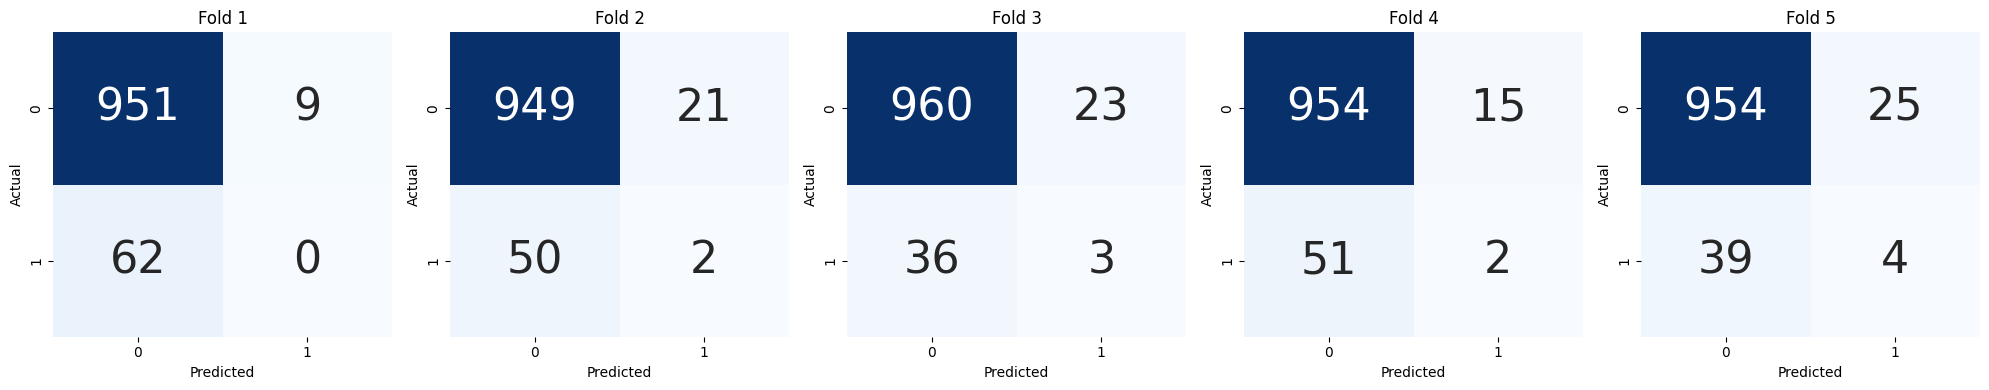

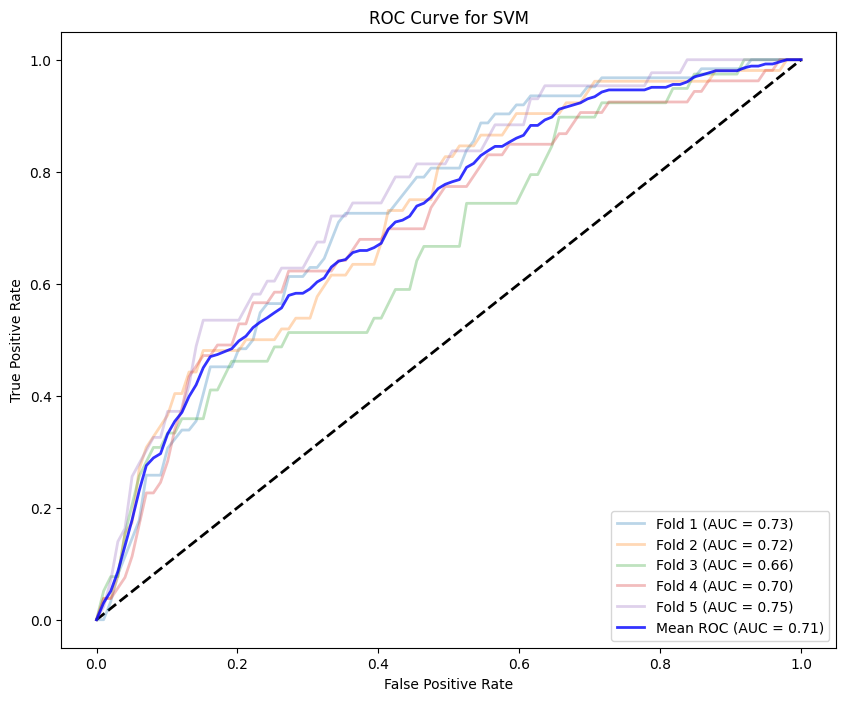

Training and evaluating K-Nearest Neighbors...
Fold 1 Accuracy: 0.8913894324853229
Fold 1 F1 Score: 0.15267175572519084
Fold 2 Accuracy: 0.9060665362035225
Fold 2 F1 Score: 0.1724137931034483
Fold 3 Accuracy: 0.8864970645792564
Fold 3 F1 Score: 0.10769230769230771
Fold 4 Accuracy: 0.8913894324853229
Fold 4 F1 Score: 0.1395348837209302
Fold 5 Accuracy: 0.8894324853228963
Fold 5 F1 Score: 0.12403100775193797
Mean Accuracy: 0.8929549902152643
Mean F1 Score: 0.139268749598763


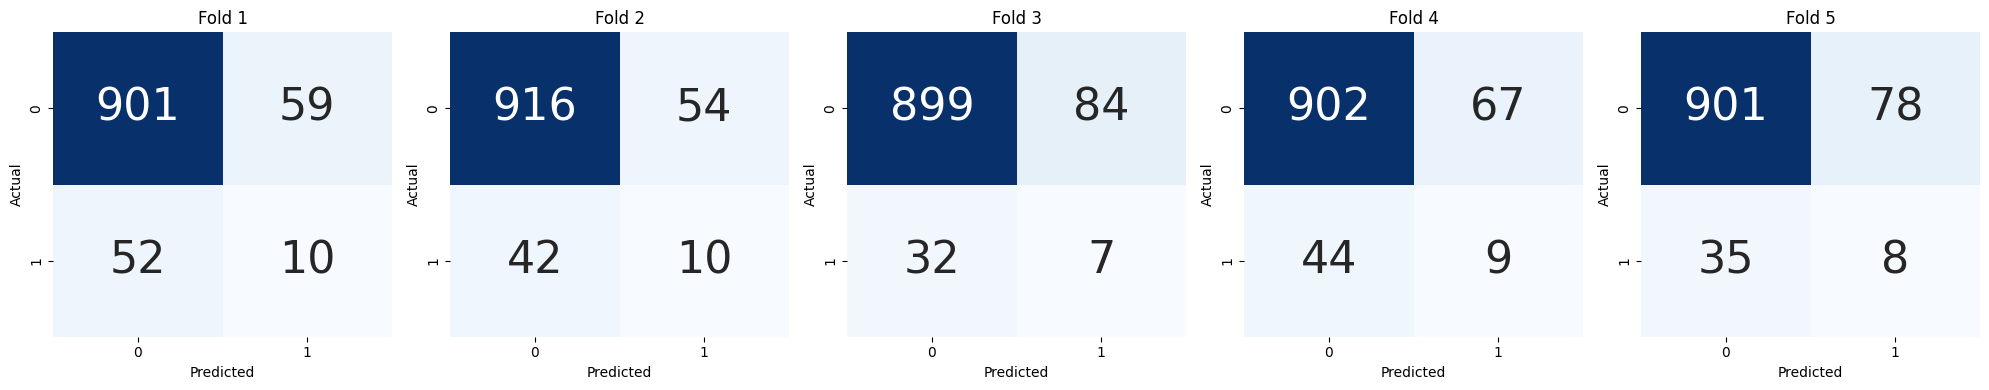

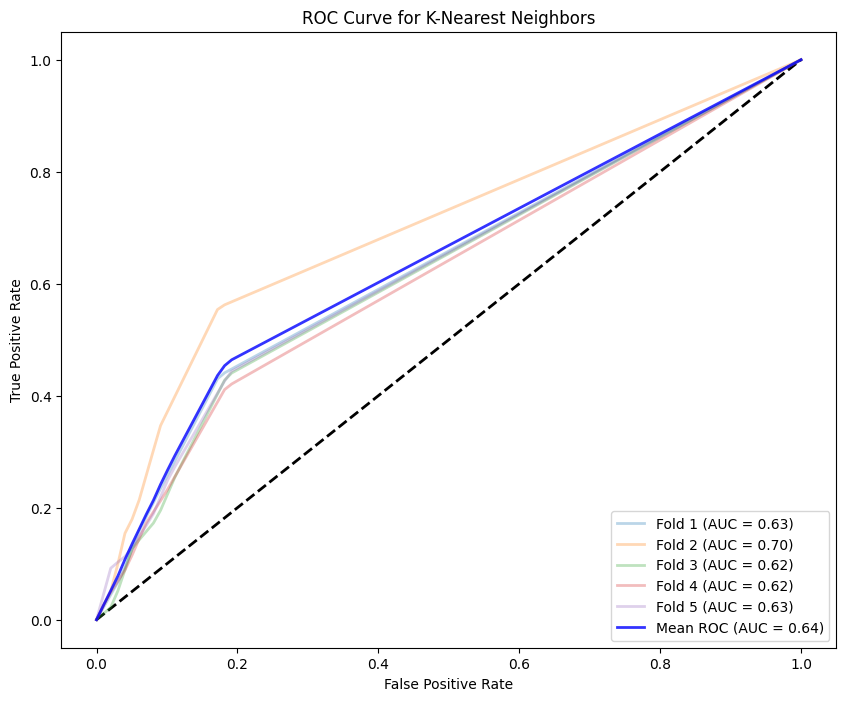

Training and evaluating Decision Tree...
Fold 1 Accuracy: 0.8776908023483366
Fold 1 F1 Score: 0.13793103448275862
Fold 2 Accuracy: 0.8933463796477495
Fold 2 F1 Score: 0.1138211382113821
Fold 3 Accuracy: 0.8884540117416829
Fold 3 F1 Score: 0.14925373134328357
Fold 4 Accuracy: 0.8816046966731899
Fold 4 F1 Score: 0.15384615384615383
Fold 5 Accuracy: 0.8923679060665362
Fold 5 F1 Score: 0.21428571428571427
Mean Accuracy: 0.8866927592954991
Mean F1 Score: 0.15382755443385848


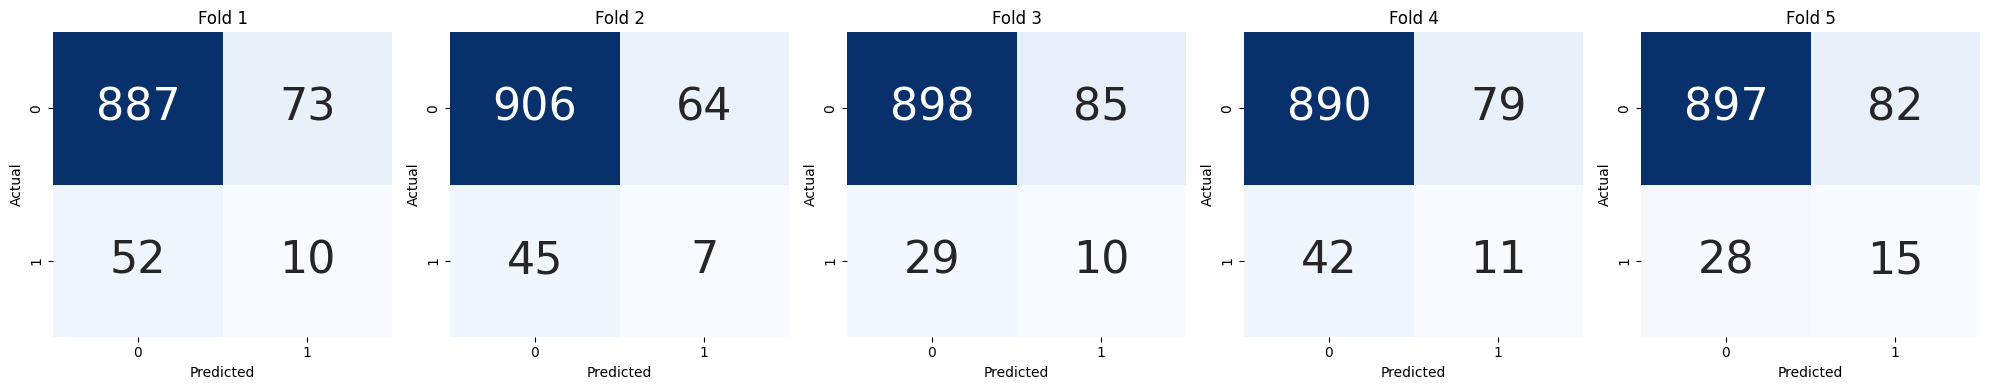

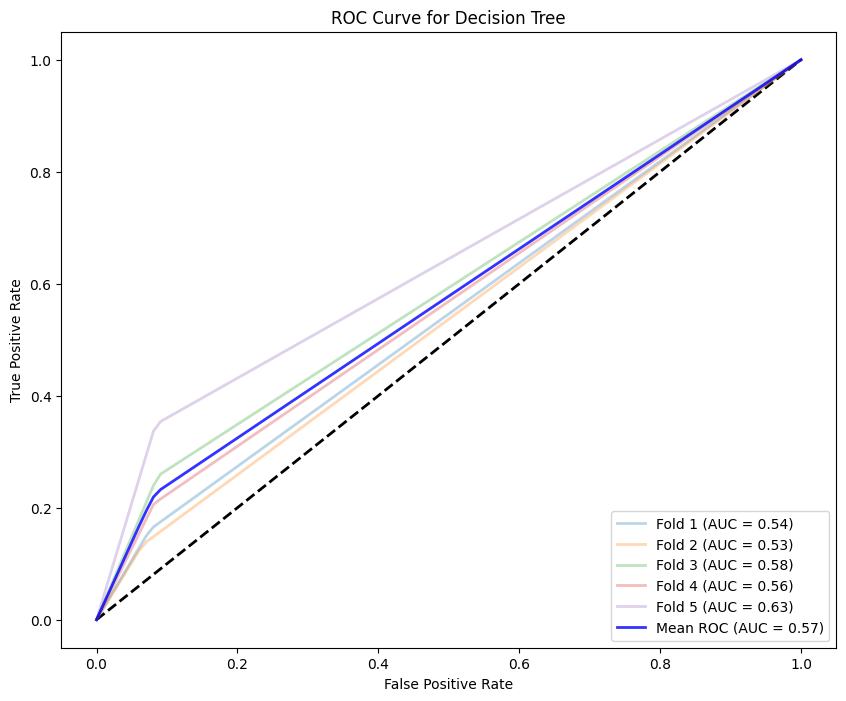

Training and evaluating Random Forest...
Fold 1 Accuracy: 0.9246575342465754
Fold 1 F1 Score: 0.09411764705882353
Fold 2 Accuracy: 0.9187866927592955
Fold 2 F1 Score: 0.1443298969072165
Fold 3 Accuracy: 0.9227005870841487
Fold 3 F1 Score: 0.04819277108433735
Fold 4 Accuracy: 0.9266144814090019
Fold 4 F1 Score: 0.11764705882352942
Fold 5 Accuracy: 0.9295499021526419
Fold 5 F1 Score: 0.14285714285714285
Mean Accuracy: 0.9244618395303327
Mean F1 Score: 0.10942890334620994


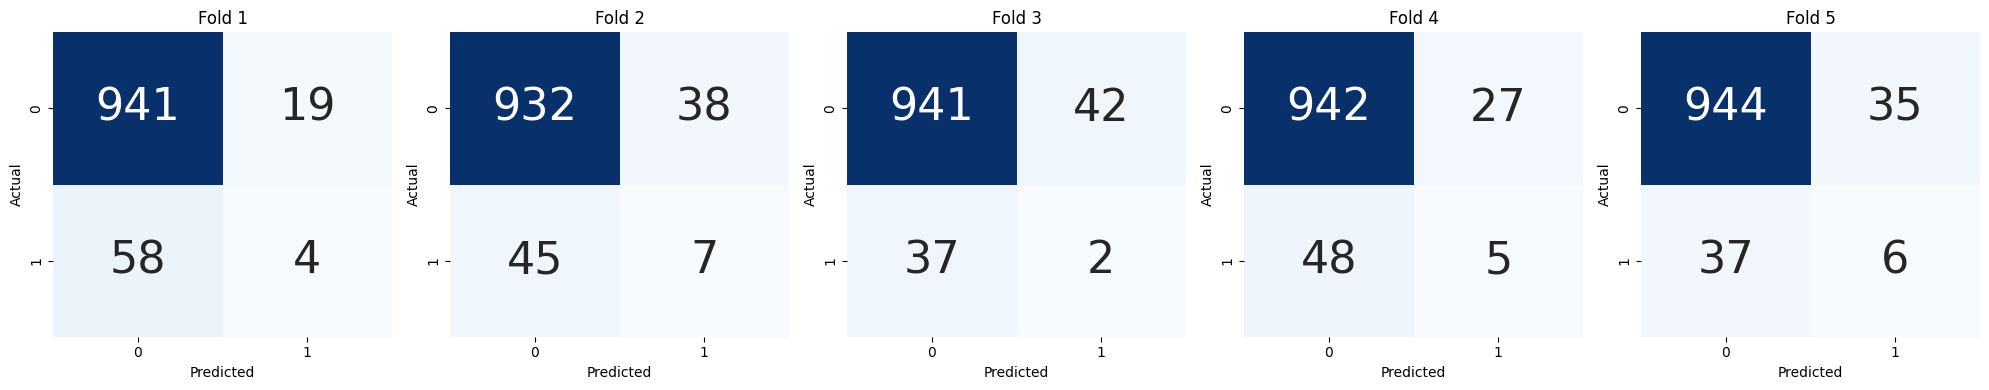

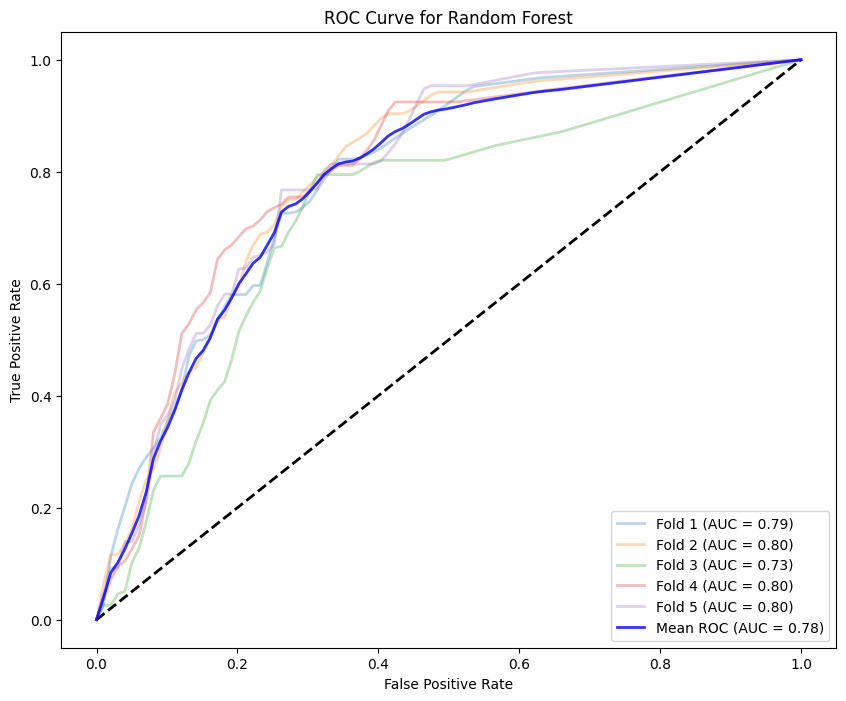

Training and evaluating Gradient Boosting...
Fold 1 Accuracy: 0.9060665362035225
Fold 1 F1 Score: 0.25
Fold 2 Accuracy: 0.8786692759295499
Fold 2 F1 Score: 0.1948051948051948
Fold 3 Accuracy: 0.8933463796477495
Fold 3 F1 Score: 0.1804511278195489
Fold 4 Accuracy: 0.8767123287671232
Fold 4 F1 Score: 0.23170731707317074
Fold 5 Accuracy: 0.8943248532289628
Fold 5 F1 Score: 0.2058823529411765
Mean Accuracy: 0.8898238747553815
Mean F1 Score: 0.21256919852781814


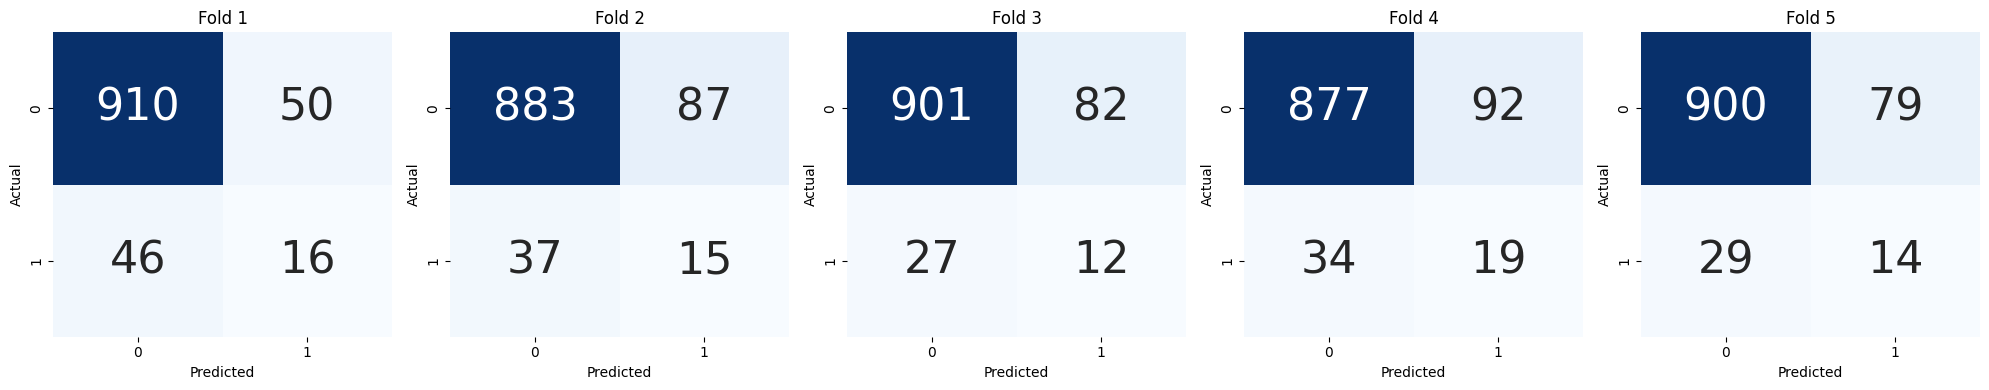

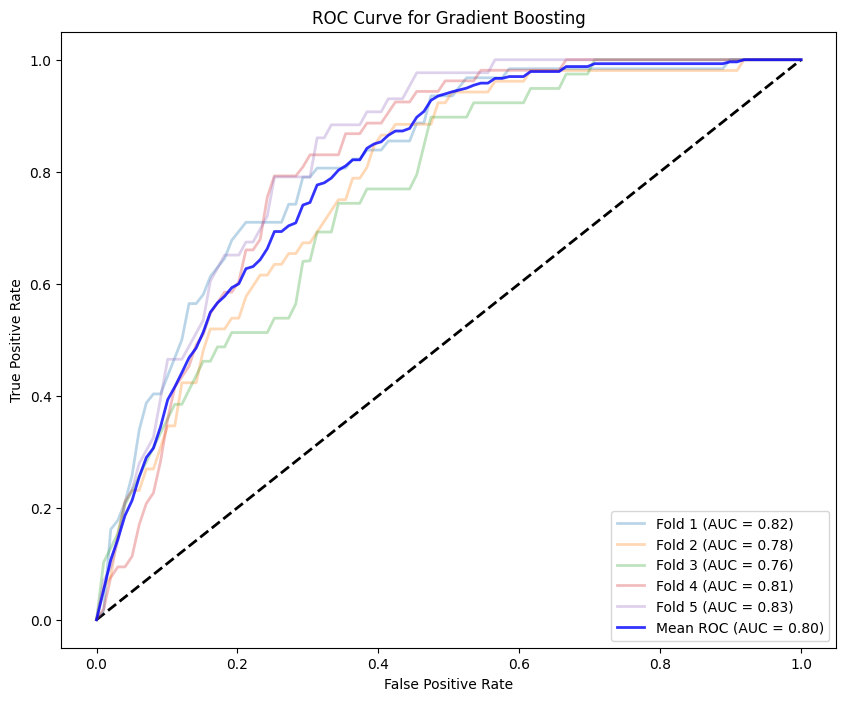

Training and evaluating AdaBoost...
Fold 1 Accuracy: 0.837573385518591
Fold 1 F1 Score: 0.29059829059829057
Fold 2 Accuracy: 0.8091976516634051
Fold 2 F1 Score: 0.19753086419753083
Fold 3 Accuracy: 0.8454011741682974
Fold 3 F1 Score: 0.19387755102040816
Fold 4 Accuracy: 0.8356164383561644
Fold 4 F1 Score: 0.26315789473684215
Fold 5 Accuracy: 0.8317025440313112
Fold 5 F1 Score: 0.18095238095238095
Mean Accuracy: 0.8318982387475538
Mean F1 Score: 0.2252233963010905


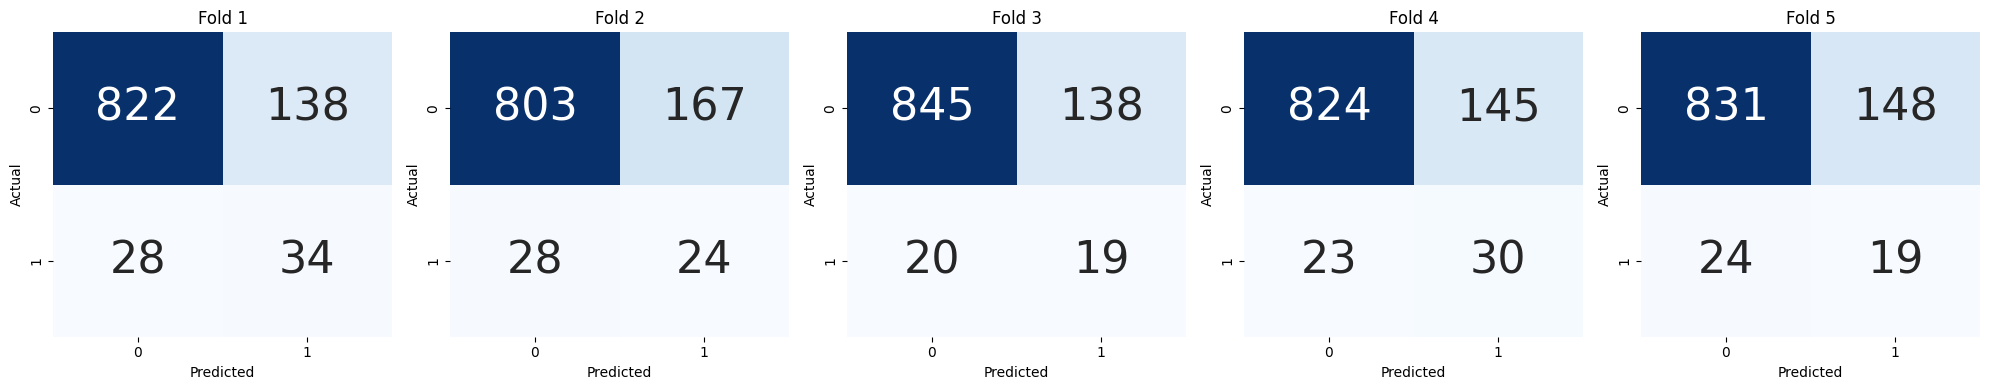

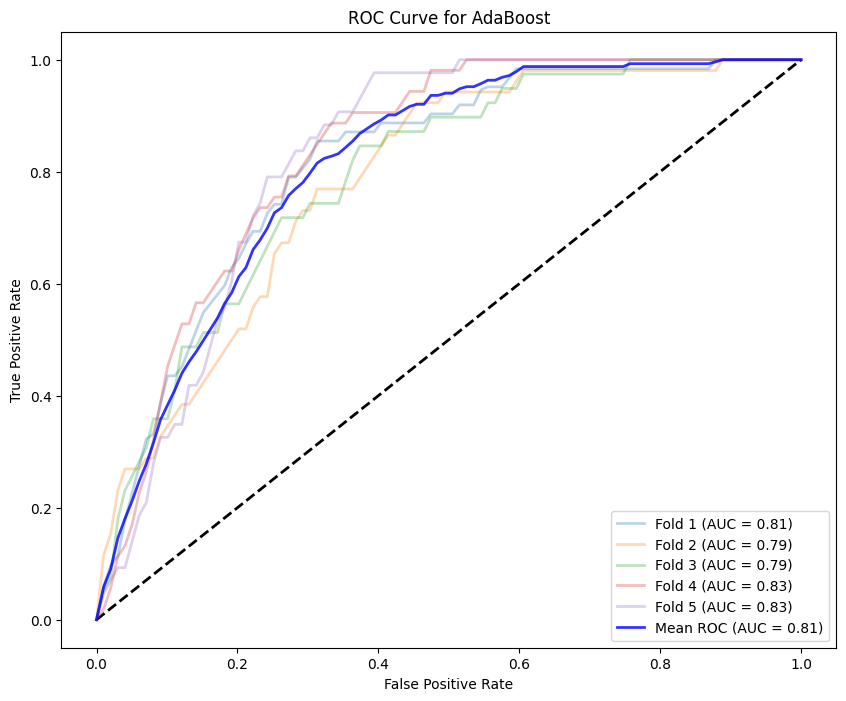

Training and evaluating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold 1 Accuracy: 0.910958904109589
Fold 1 F1 Score: 0.061855670103092786
Fold 2 Accuracy: 0.9266144814090019
Fold 2 F1 Score: 0.13793103448275865
Fold 3 Accuracy: 0.9383561643835616
Fold 3 F1 Score: 0.08695652173913043
Fold 4 Accuracy: 0.9217221135029354
Fold 4 F1 Score: 0.16666666666666666
Fold 5 Accuracy: 0.9256360078277887
Fold 5 F1 Score: 0.15555555555555556
Mean Accuracy: 0.9246575342465754
Mean F1 Score: 0.1217930897094408


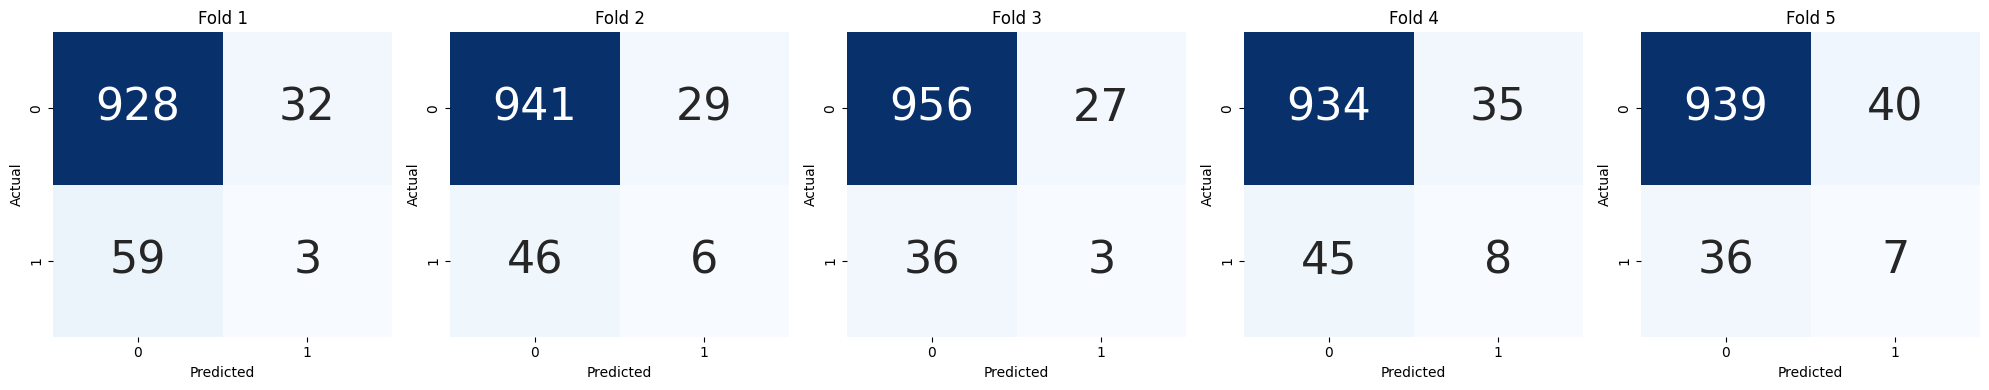

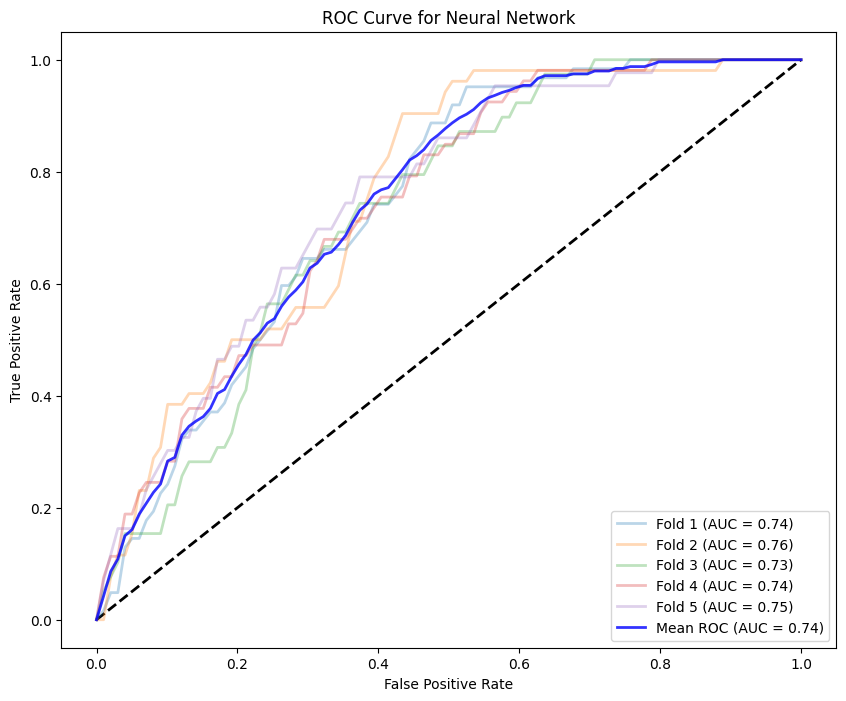

In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 불러오기
data = pd.read_csv("pre_info2.csv")

# 'id' 열 제거
data = data.drop(columns=['id'])

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data, drop_first=True)

# 독립 변수와 종속 변수를 분리합니다.
X = data.drop(columns=['stroke'])
y = data['stroke']


# # 주요 특징들만 선택(상위 10개) 이 부분만 바꿔서 훈련
# selected_features = ['age', 'bmi', 'avg_glucose_level','age_group_(70, 80]', 'hypertension','smoking_status_never smoked', 'gender_Male','Residence_type_Rural','gender_Female', 'heart_disease']
# X = data[selected_features]
# y = data['stroke']



# KFold 객체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델들 정의
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Neural Network", MLPClassifier(random_state=42))
]

# 각 모델별로 학습, 평가 수행
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracies = []
    f1_scores = []
    conf_matrices = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # SMOTE를 사용하여 학습 데이터를 오버샘플링
        smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # # Borderline-SMOTE를 사용하여 데이터를 오버샘플링
        # borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
        # X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

        # 모델 훈련
        model.fit(X_train_resampled, y_train_resampled)

        # 예측
        y_pred = model.predict(X_test)

        # 정확도 및 F1 점수 계산 및 저장
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1_scores.append(f1)

        # 혼동 행렬 계산 및 저장
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)

        # ROC 커브 계산
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # 각 fold에서의 정확도 및 F1 점수 출력
    for i, (accuracy, f1) in enumerate(zip(accuracies, f1_scores)):
        print(f"Fold {i+1} Accuracy: {accuracy}")
        print(f"Fold {i+1} F1 Score: {f1}")

    # 최종 평균 정확도 및 F1 점수 출력
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    print(f"Mean F1 Score: {np.mean(f1_scores)}")

    # 혼동 행렬 시각화
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, cm in enumerate(conf_matrices):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False, annot_kws={"size": 32})
        axes[i].set_title(f'Fold {i+1}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # ROC 커브 시각화
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    for i, (tpr, roc_auc) in enumerate(zip(tprs, aucs)):
        plt.plot(mean_fpr, tpr, lw=2, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Training and evaluating Logistic Regression...
Fold 1 Accuracy: 0.7279843444227005
Fold 1 F1 Score: 0.2760416666666667
Fold 2 Accuracy: 0.7162426614481409
Fold 2 F1 Score: 0.2245989304812834
Fold 3 Accuracy: 0.7064579256360078
Fold 3 F1 Score: 0.1758241758241758
Fold 4 Accuracy: 0.7367906066536204
Fold 4 F1 Score: 0.2422535211267606
Fold 5 Accuracy: 0.7455968688845401
Fold 5 F1 Score: 0.2215568862275449
Mean Accuracy: 0.7266144814090019
Mean F1 Score: 0.22805503606528627


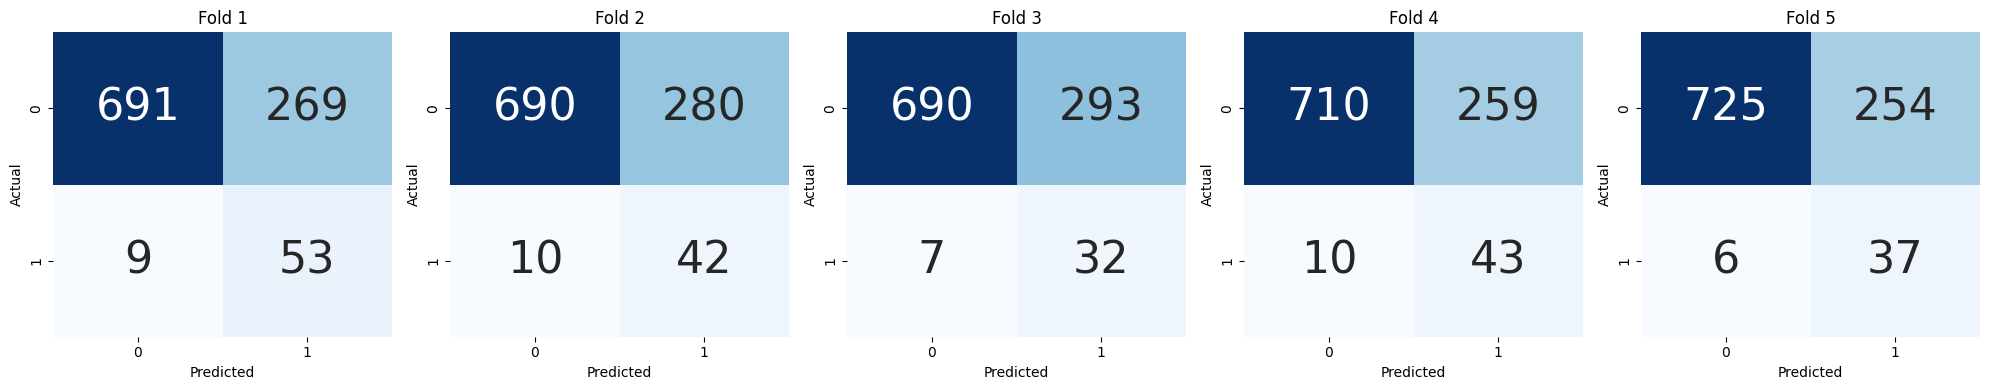

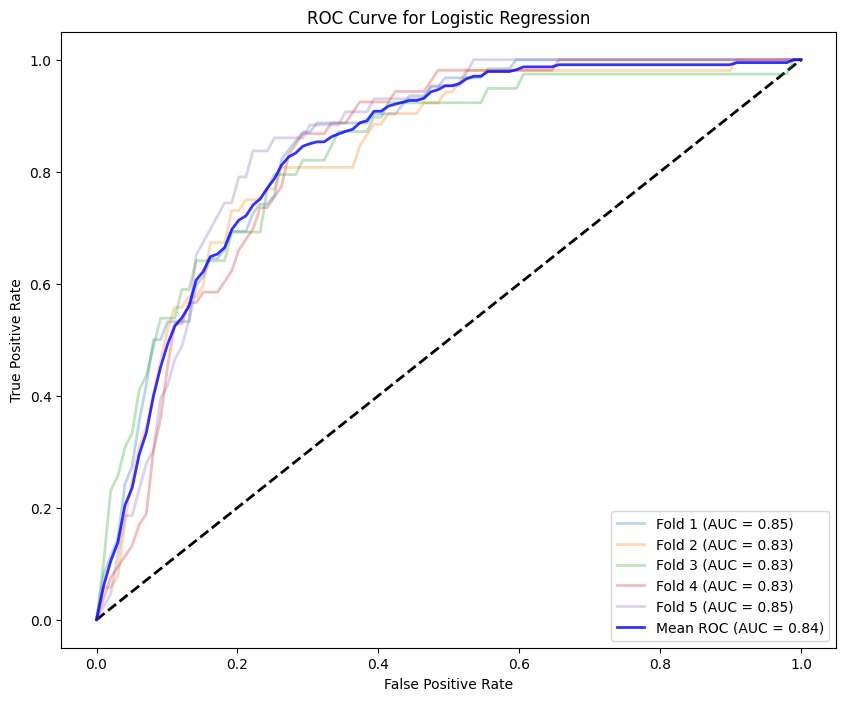

Training and evaluating SVM...
Fold 1 Accuracy: 0.7270058708414873
Fold 1 F1 Score: 0.25201072386058976
Fold 2 Accuracy: 0.7338551859099804
Fold 2 F1 Score: 0.20930232558139533
Fold 3 Accuracy: 0.7015655577299413
Fold 3 F1 Score: 0.12607449856733527
Fold 4 Accuracy: 0.7338551859099804
Fold 4 F1 Score: 0.22727272727272727
Fold 5 Accuracy: 0.7553816046966731
Fold 5 F1 Score: 0.16666666666666666
Mean Accuracy: 0.7303326810176125
Mean F1 Score: 0.19626538838974286


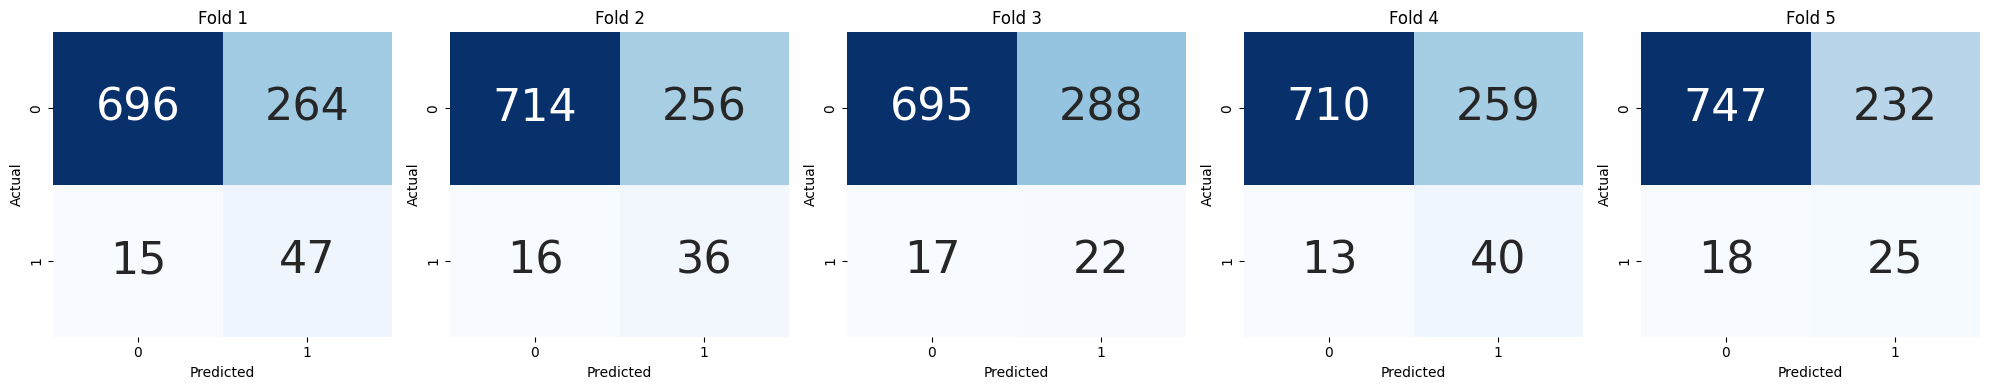

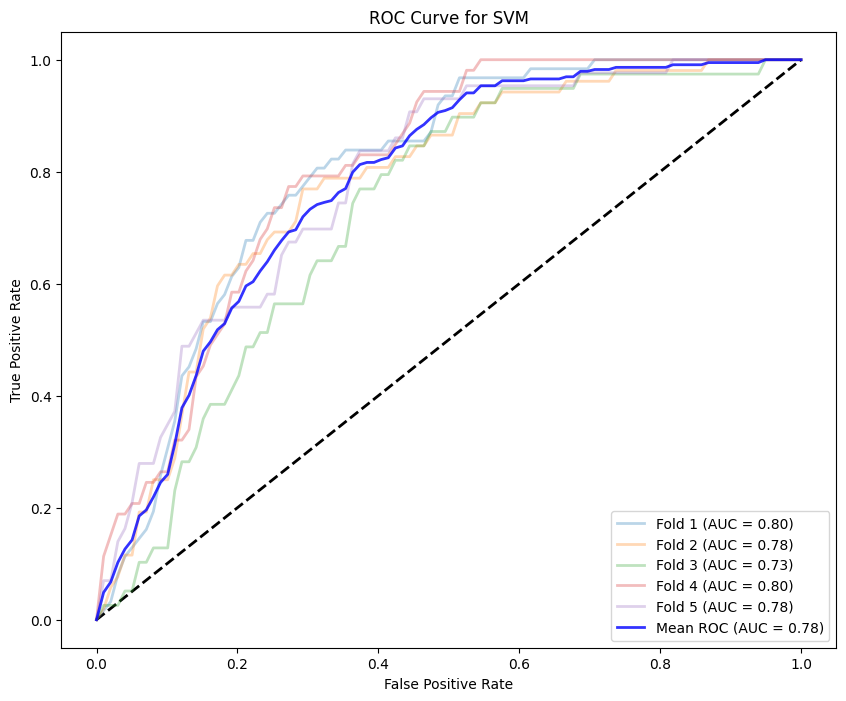

Training and evaluating K-Nearest Neighbors...
Fold 1 Accuracy: 0.8062622309197651
Fold 1 F1 Score: 0.2325581395348837
Fold 2 Accuracy: 0.786692759295499
Fold 2 F1 Score: 0.18045112781954886
Fold 3 Accuracy: 0.7622309197651663
Fold 3 F1 Score: 0.13523131672597863
Fold 4 Accuracy: 0.7886497064579256
Fold 4 F1 Score: 0.21739130434782605
Fold 5 Accuracy: 0.7915851272015656
Fold 5 F1 Score: 0.11618257261410787
Mean Accuracy: 0.7870841487279845
Mean F1 Score: 0.17636289220846904


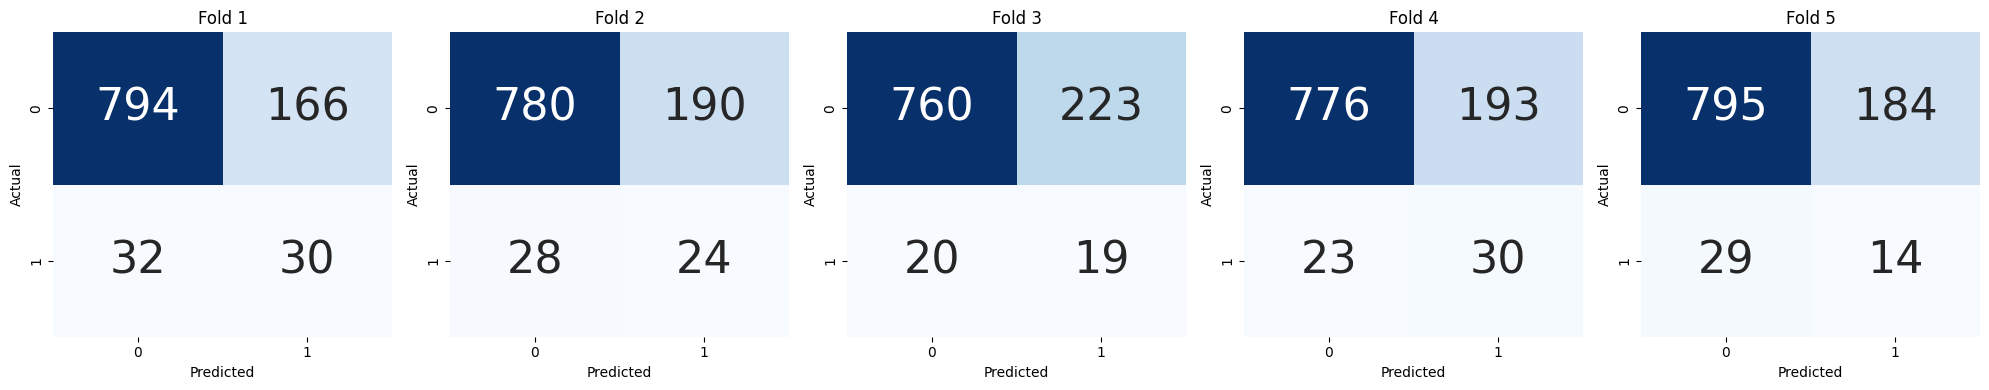

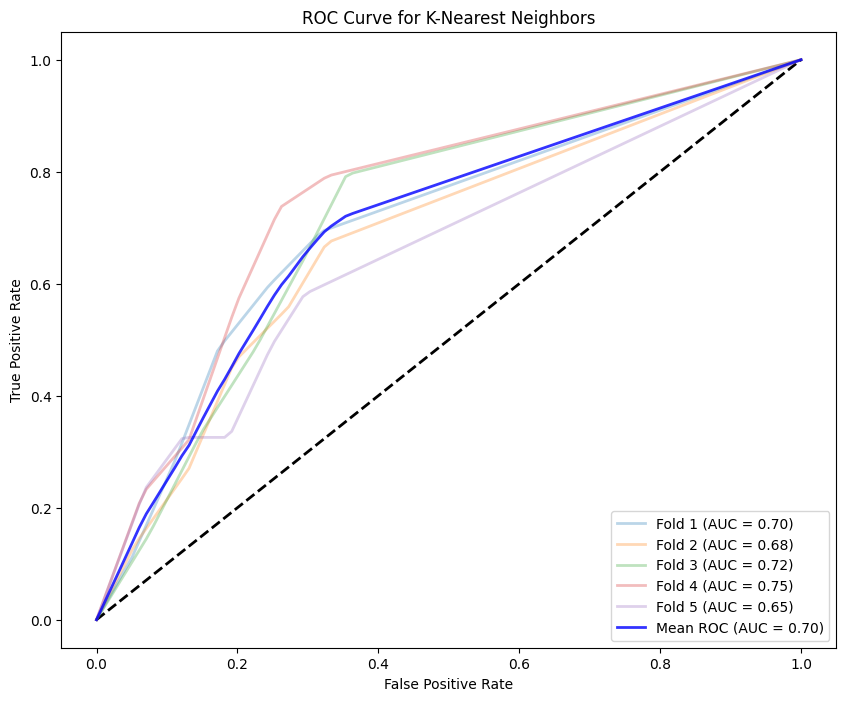

Training and evaluating Decision Tree...
Fold 1 Accuracy: 0.8444227005870841
Fold 1 F1 Score: 0.19289340101522842
Fold 2 Accuracy: 0.8532289628180039
Fold 2 F1 Score: 0.15730337078651685
Fold 3 Accuracy: 0.850293542074364
Fold 3 F1 Score: 0.11560693641618497
Fold 4 Accuracy: 0.850293542074364
Fold 4 F1 Score: 0.17297297297297298
Fold 5 Accuracy: 0.8512720156555773
Fold 5 F1 Score: 0.15555555555555556
Mean Accuracy: 0.8499021526418786
Mean F1 Score: 0.15886644734929176


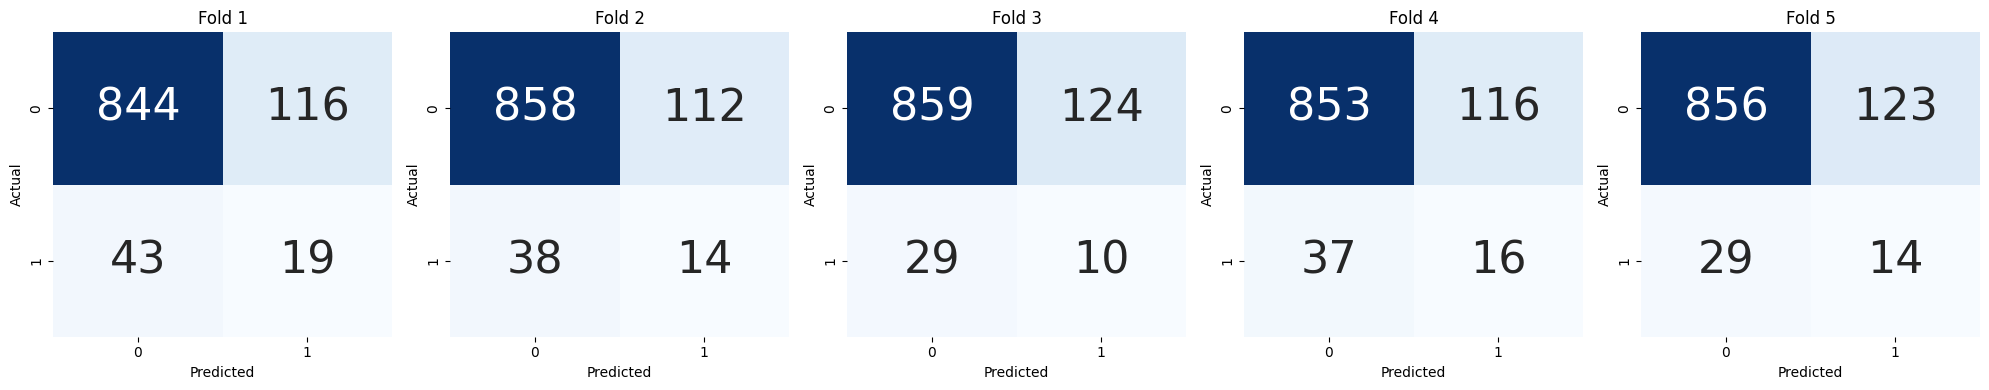

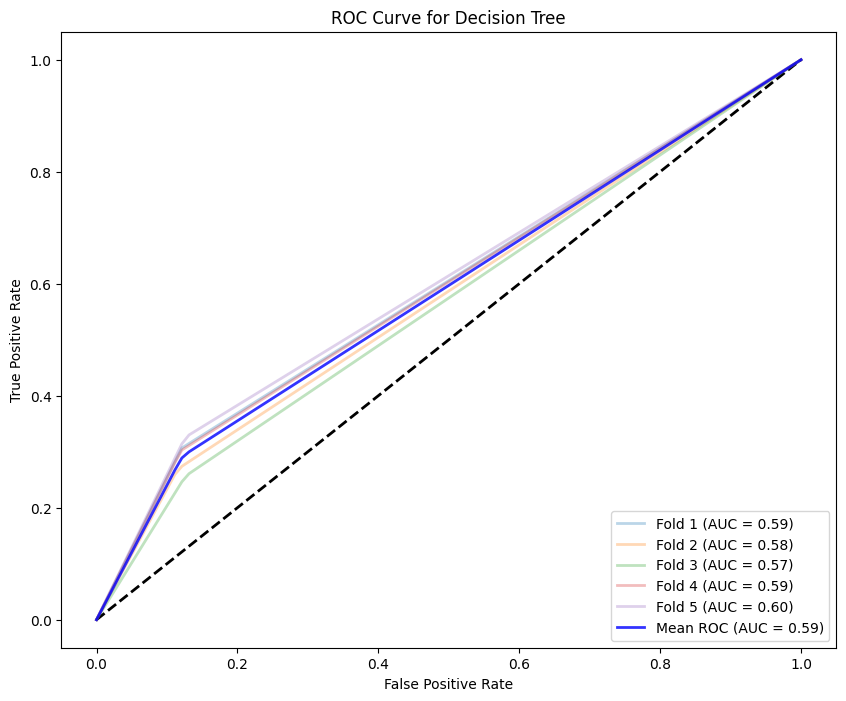

Training and evaluating Random Forest...
Fold 1 Accuracy: 0.8679060665362035
Fold 1 F1 Score: 0.2105263157894737
Fold 2 Accuracy: 0.8718199608610567
Fold 2 F1 Score: 0.20606060606060608
Fold 3 Accuracy: 0.8414872798434442
Fold 3 F1 Score: 0.06896551724137931
Fold 4 Accuracy: 0.8649706457925636
Fold 4 F1 Score: 0.18823529411764706
Fold 5 Accuracy: 0.8659491193737769
Fold 5 F1 Score: 0.15950920245398775
Mean Accuracy: 0.862426614481409
Mean F1 Score: 0.1666593871326188


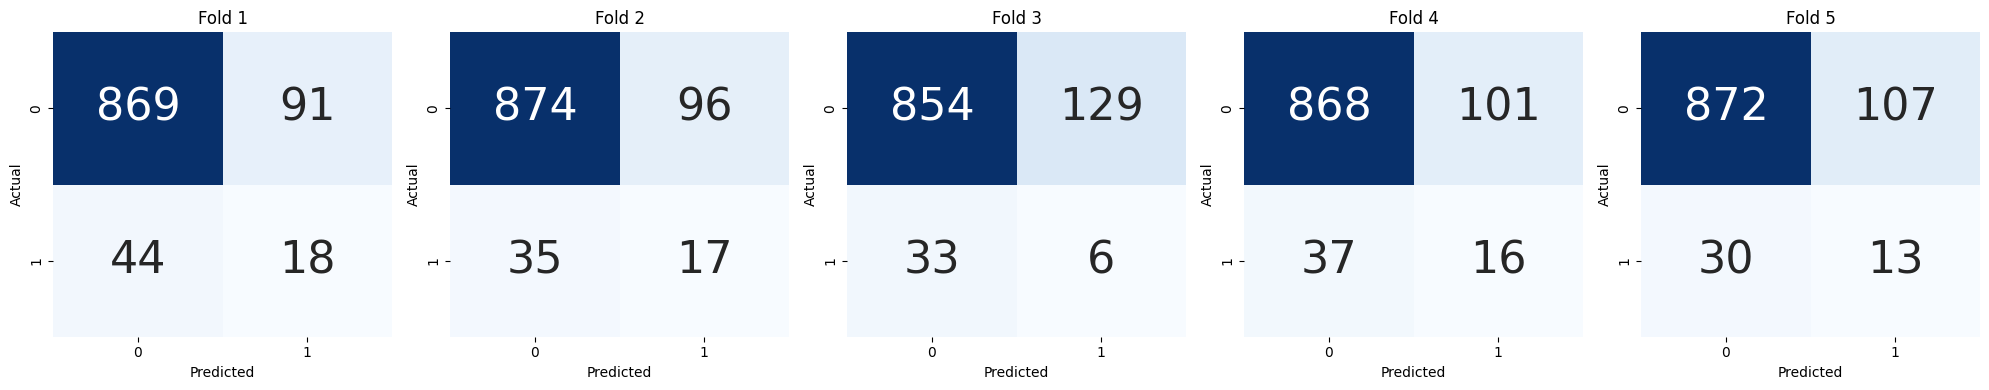

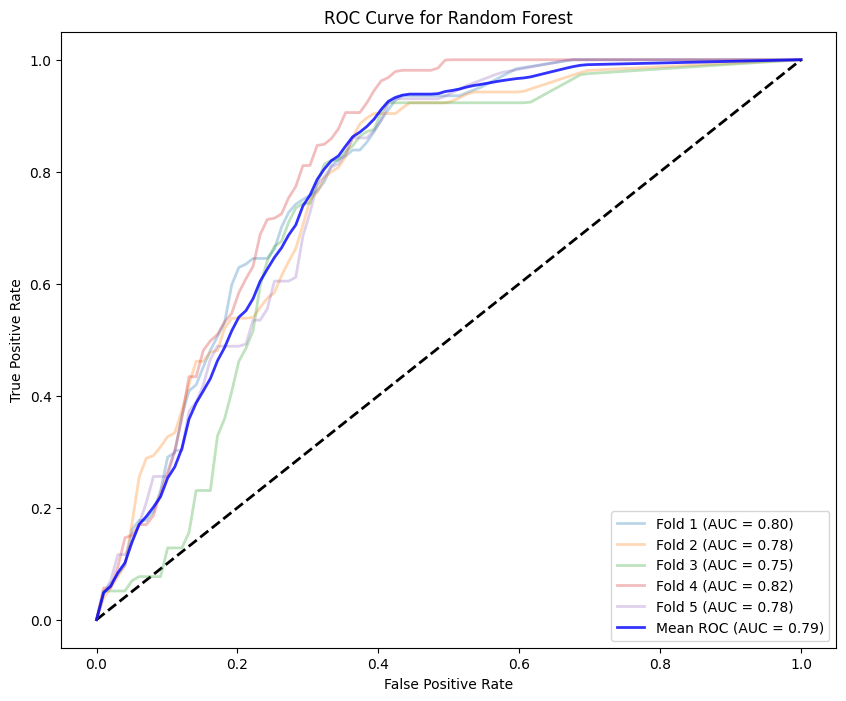

Training and evaluating Gradient Boosting...
Fold 1 Accuracy: 0.7661448140900196
Fold 1 F1 Score: 0.24605678233438485
Fold 2 Accuracy: 0.7583170254403131
Fold 2 F1 Score: 0.19543973941368079
Fold 3 Accuracy: 0.764187866927593
Fold 3 F1 Score: 0.14840989399293283
Fold 4 Accuracy: 0.764187866927593
Fold 4 F1 Score: 0.22006472491909385
Fold 5 Accuracy: 0.8131115459882583
Fold 5 F1 Score: 0.22672064777327938
Mean Accuracy: 0.7731898238747553
Mean F1 Score: 0.20733835768667436


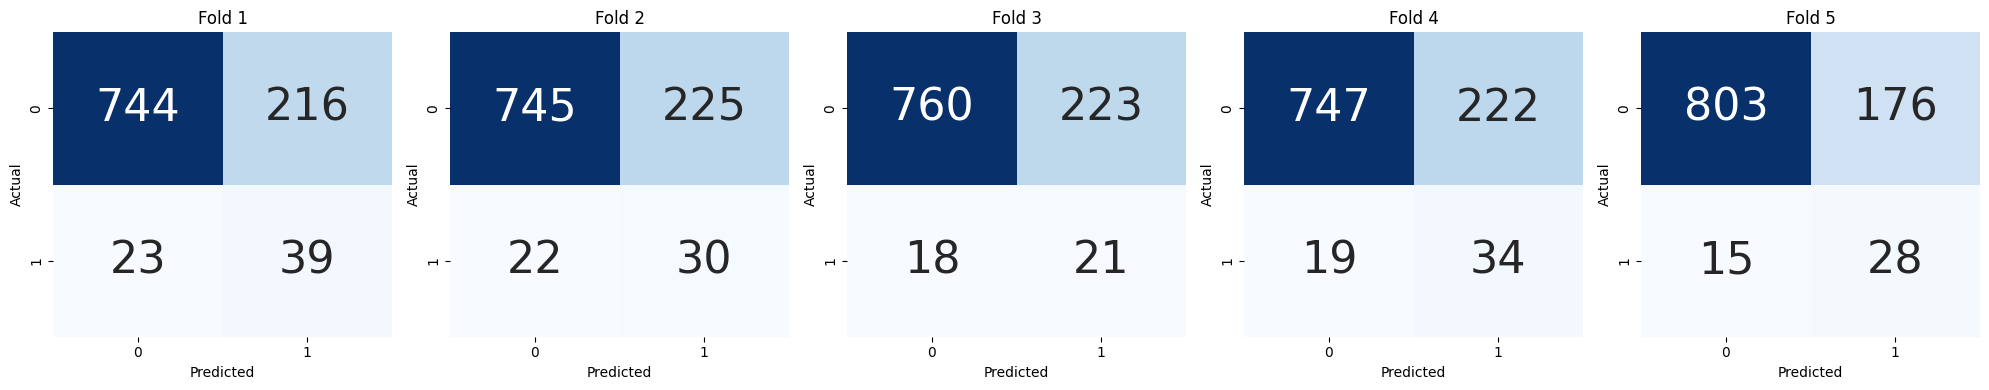

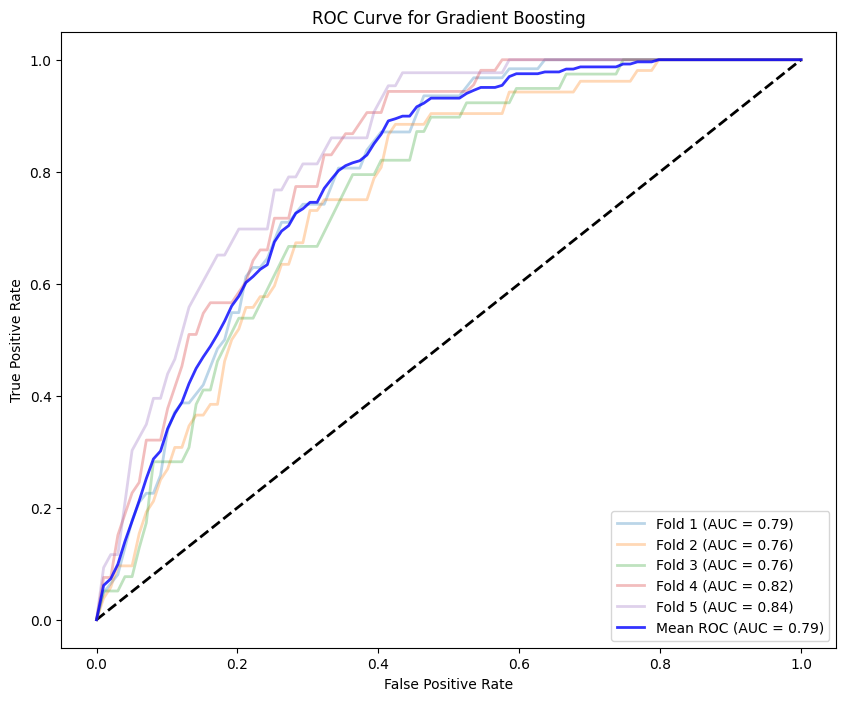

Training and evaluating AdaBoost...
Fold 1 Accuracy: 0.7328767123287672
Fold 1 F1 Score: 0.2520547945205479
Fold 2 Accuracy: 0.7064579256360078
Fold 2 F1 Score: 0.18478260869565216
Fold 3 Accuracy: 0.726027397260274
Fold 3 F1 Score: 0.16666666666666666
Fold 4 Accuracy: 0.7123287671232876
Fold 4 F1 Score: 0.2180851063829787
Fold 5 Accuracy: 0.7338551859099804
Fold 5 F1 Score: 0.19999999999999998
Mean Accuracy: 0.7223091976516633
Mean F1 Score: 0.2043178352531691


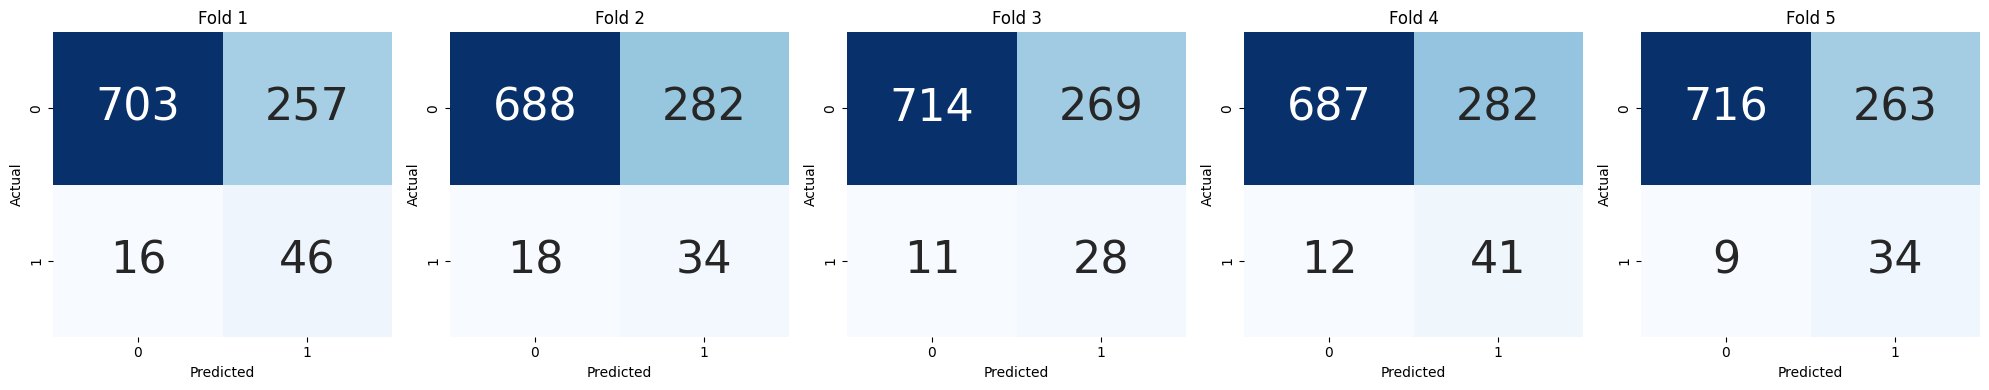

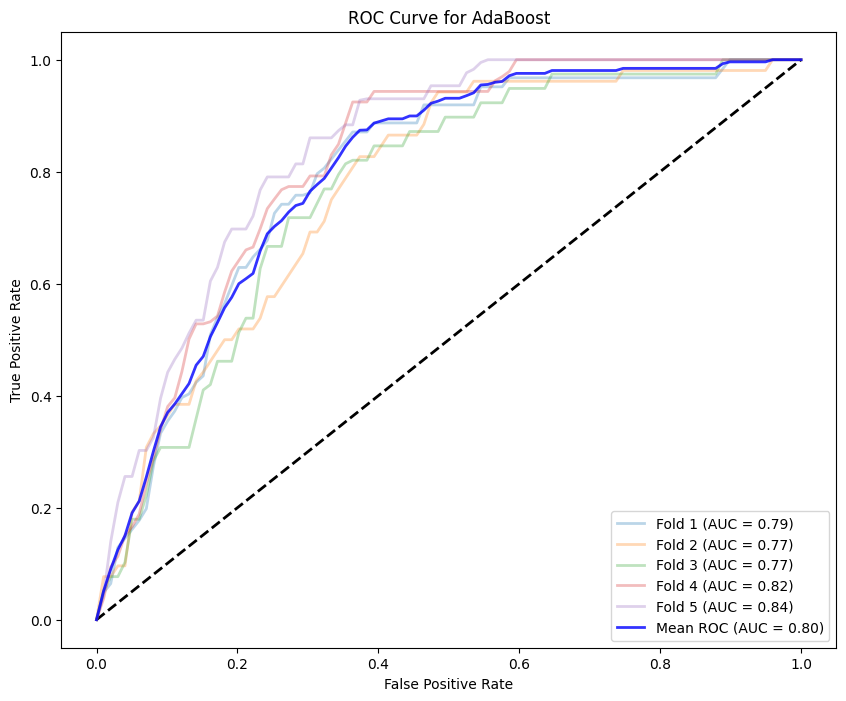

Training and evaluating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold 1 Accuracy: 0.7553816046966731
Fold 1 F1 Score: 0.21875
Fold 2 Accuracy: 0.7671232876712328
Fold 2 F1 Score: 0.20666666666666667
Fold 3 Accuracy: 0.7465753424657534
Fold 3 F1 Score: 0.15081967213114755
Fold 4 Accuracy: 0.773972602739726
Fold 4 F1 Score: 0.2169491525423729
Fold 5 Accuracy: 0.7729941291585127
Fold 5 F1 Score: 0.18309859154929575
Mean Accuracy: 0.7632093933463796
Mean F1 Score: 0.19525681657789656


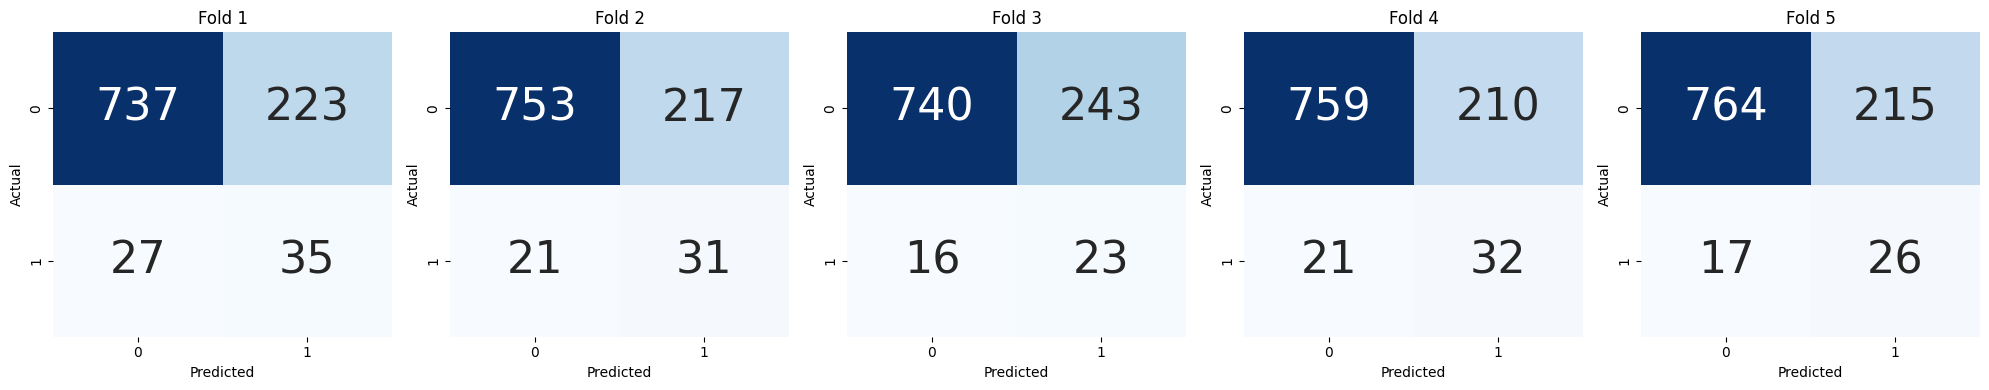

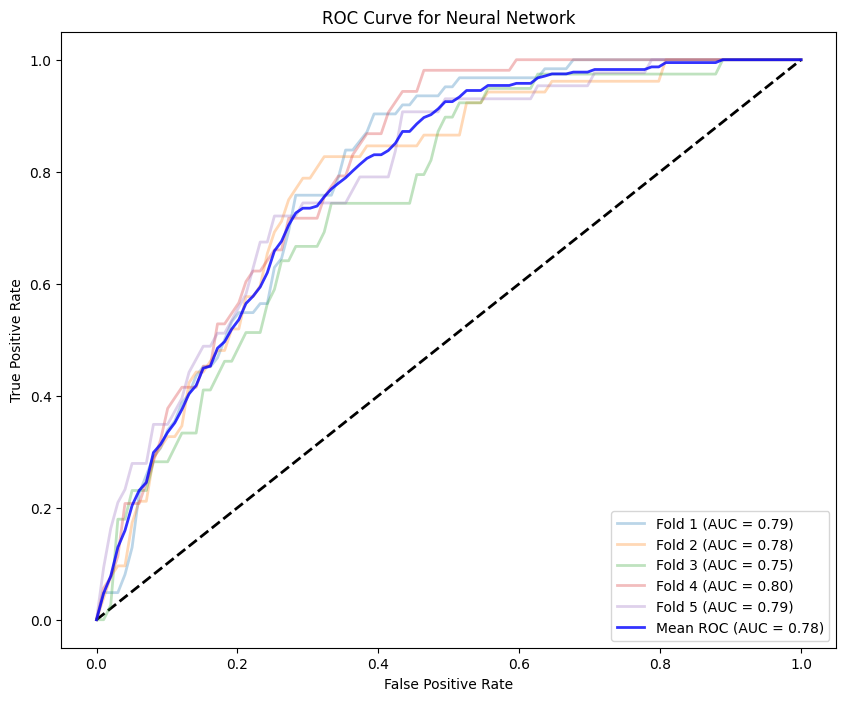

In [4]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 불러오기
data = pd.read_csv("pre_info2.csv")

# 'id' 열 제거
data = data.drop(columns=['id'])

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data, drop_first=True)

# # 독립 변수와 종속 변수를 분리합니다.
# X = data.drop(columns=['stroke'])
# y = data['stroke']


# 주요 특징들만 선택(상위 10개) 이 부분만 바꿔서 훈련
selected_features = ['age', 'bmi', 'avg_glucose_level','age_group_(70, 80]', 'hypertension','smoking_status_never smoked', 'gender_Male','Residence_type_Rural','gender_Female', 'heart_disease']
X = data[selected_features]
y = data['stroke']



# KFold 객체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델들 정의
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Neural Network", MLPClassifier(random_state=42))
]

# 각 모델별로 학습, 평가 수행
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracies = []
    f1_scores = []
    conf_matrices = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # SMOTE를 사용하여 학습 데이터를 오버샘플링
        smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # # Borderline-SMOTE를 사용하여 데이터를 오버샘플링
        # borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
        # X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

        # 모델 훈련
        model.fit(X_train_resampled, y_train_resampled)

        # 예측
        y_pred = model.predict(X_test)

        # 정확도 및 F1 점수 계산 및 저장
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1_scores.append(f1)

        # 혼동 행렬 계산 및 저장
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)

        # ROC 커브 계산
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # 각 fold에서의 정확도 및 F1 점수 출력
    for i, (accuracy, f1) in enumerate(zip(accuracies, f1_scores)):
        print(f"Fold {i+1} Accuracy: {accuracy}")
        print(f"Fold {i+1} F1 Score: {f1}")

    # 최종 평균 정확도 및 F1 점수 출력
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    print(f"Mean F1 Score: {np.mean(f1_scores)}")

    # 혼동 행렬 시각화
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, cm in enumerate(conf_matrices):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False, annot_kws={"size": 32})
        axes[i].set_title(f'Fold {i+1}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # ROC 커브 시각화
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    for i, (tpr, roc_auc) in enumerate(zip(tprs, aucs)):
        plt.plot(mean_fpr, tpr, lw=2, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Training and evaluating Logistic Regression...
Fold 1 Accuracy: 0.7720156555772995
Fold 1 F1 Score: 0.2917933130699088
Fold 2 Accuracy: 0.7514677103718199
Fold 2 F1 Score: 0.24404761904761904
Fold 3 Accuracy: 0.7544031311154599
Fold 3 F1 Score: 0.18241042345276876
Fold 4 Accuracy: 0.7808219178082192
Fold 4 F1 Score: 0.24324324324324323
Fold 5 Accuracy: 0.7749510763209393
Fold 5 F1 Score: 0.23841059602649003
Mean Accuracy: 0.7667318982387477
Mean F1 Score: 0.23998103896800593


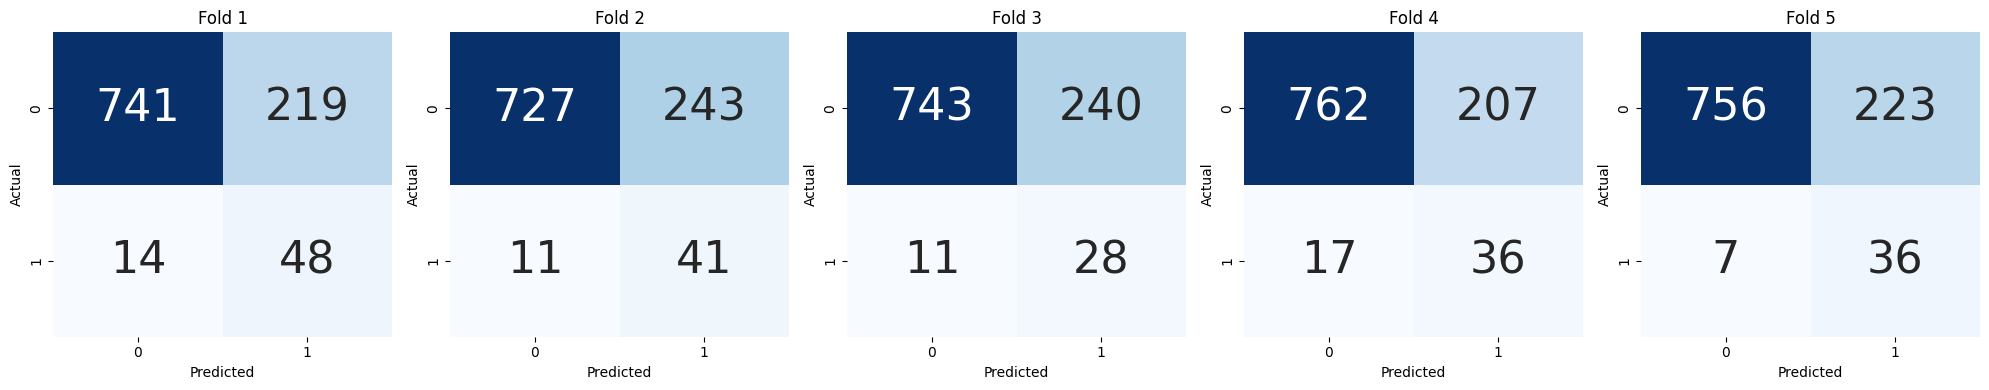

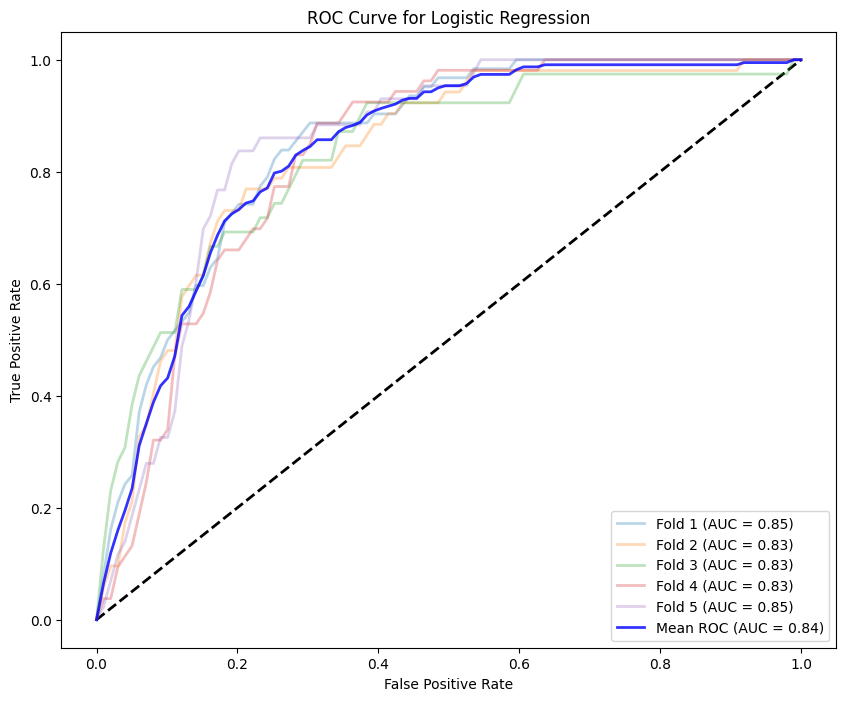

Training and evaluating SVM...
Fold 1 Accuracy: 0.7837573385518591
Fold 1 F1 Score: 0.2608695652173913
Fold 2 Accuracy: 0.7847358121330724
Fold 2 F1 Score: 0.20289855072463767
Fold 3 Accuracy: 0.7622309197651663
Fold 3 F1 Score: 0.13523131672597863
Fold 4 Accuracy: 0.7925636007827789
Fold 4 F1 Score: 0.2318840579710145
Fold 5 Accuracy: 0.7847358121330724
Fold 5 F1 Score: 0.20289855072463767
Mean Accuracy: 0.7816046966731898
Mean F1 Score: 0.20675640827273195


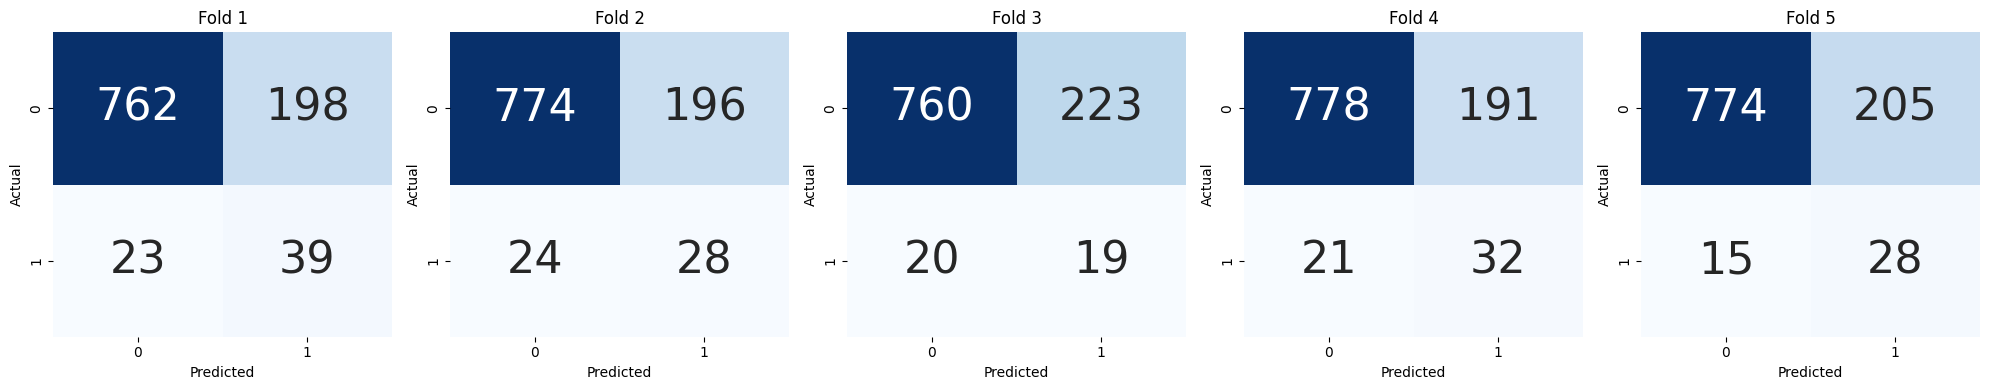

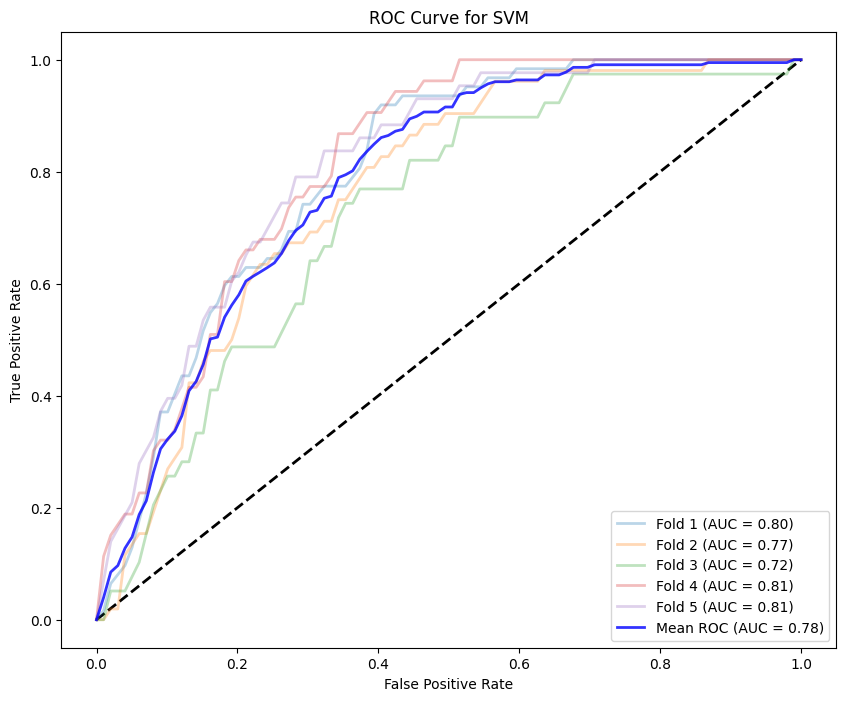

Training and evaluating K-Nearest Neighbors...
Fold 1 Accuracy: 0.8483365949119374
Fold 1 F1 Score: 0.25837320574162675
Fold 2 Accuracy: 0.8268101761252447
Fold 2 F1 Score: 0.15311004784688997
Fold 3 Accuracy: 0.8199608610567515
Fold 3 F1 Score: 0.1320754716981132
Fold 4 Accuracy: 0.8336594911937377
Fold 4 F1 Score: 0.2410714285714286
Fold 5 Accuracy: 0.8131115459882583
Fold 5 F1 Score: 0.13574660633484165
Mean Accuracy: 0.8283757338551858
Mean F1 Score: 0.18407535203858005


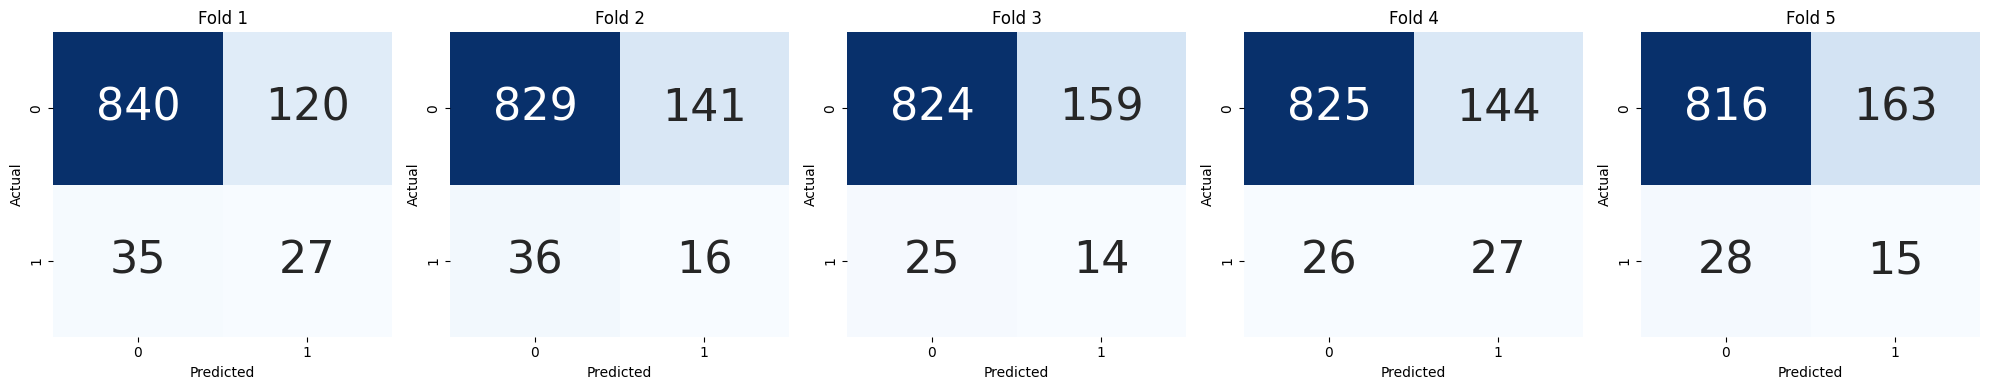

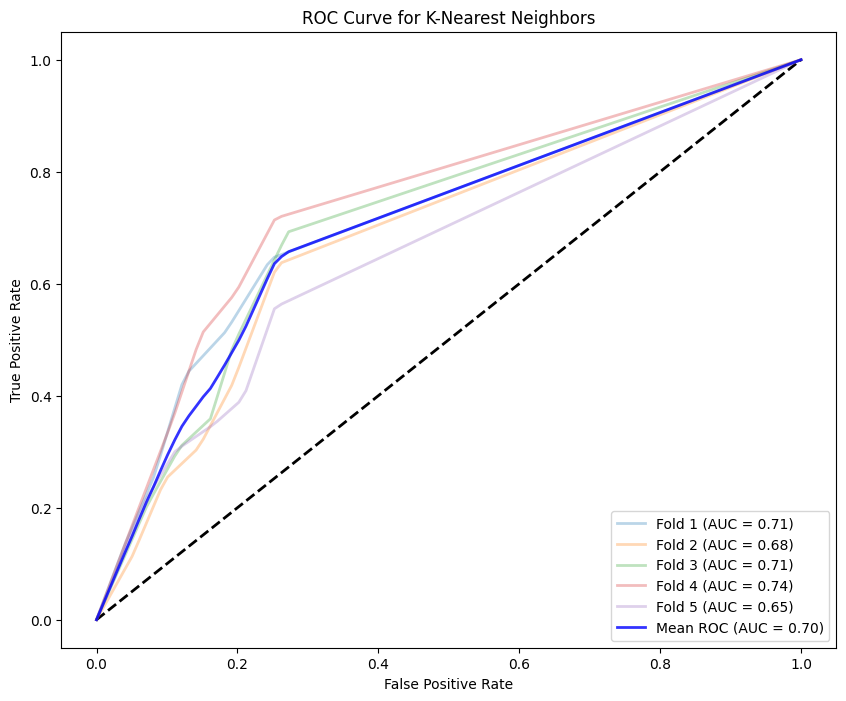

Training and evaluating Decision Tree...
Fold 1 Accuracy: 0.87279843444227
Fold 1 F1 Score: 0.25287356321839083
Fold 2 Accuracy: 0.8737769080234834
Fold 2 F1 Score: 0.2275449101796407
Fold 3 Accuracy: 0.8659491193737769
Fold 3 F1 Score: 0.12738853503184713
Fold 4 Accuracy: 0.8698630136986302
Fold 4 F1 Score: 0.15286624203821658
Fold 5 Accuracy: 0.8806262230919765
Fold 5 F1 Score: 0.11594202898550726
Mean Accuracy: 0.8726027397260274
Mean F1 Score: 0.17532305589072053


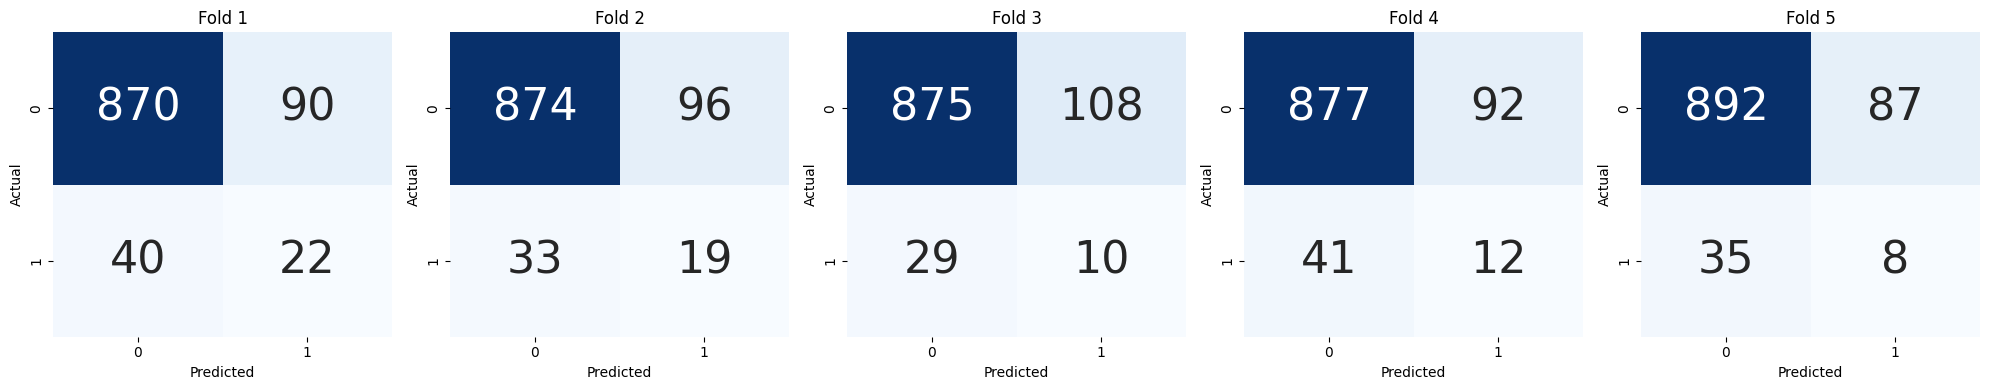

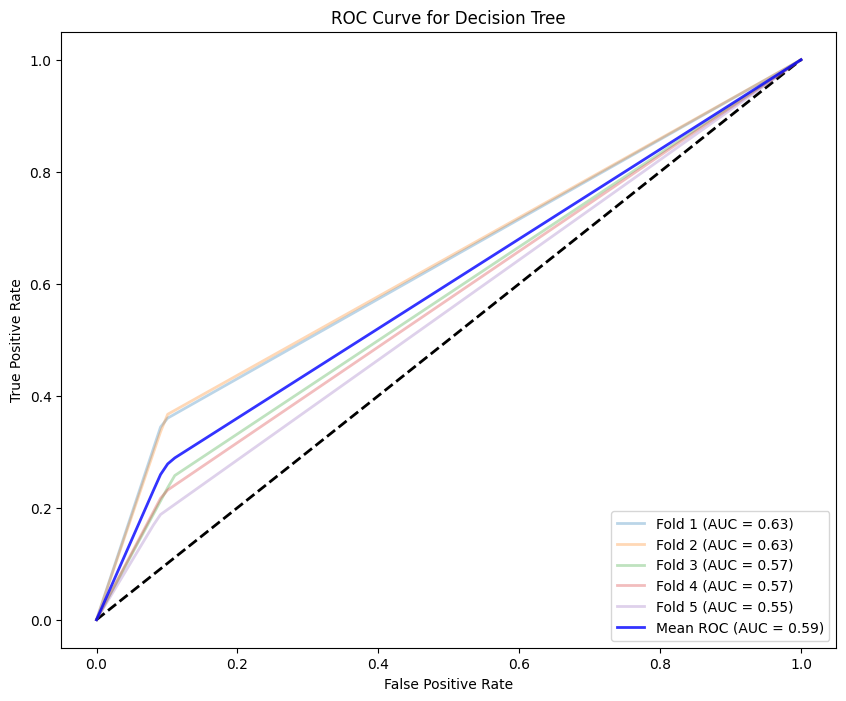

Training and evaluating Random Forest...
Fold 1 Accuracy: 0.8864970645792564
Fold 1 F1 Score: 0.12121212121212123
Fold 2 Accuracy: 0.8904109589041096
Fold 2 F1 Score: 0.16417910447761194
Fold 3 Accuracy: 0.8767123287671232
Fold 3 F1 Score: 0.05970149253731343
Fold 4 Accuracy: 0.8845401174168297
Fold 4 F1 Score: 0.15714285714285714
Fold 5 Accuracy: 0.8845401174168297
Fold 5 F1 Score: 0.15714285714285714
Mean Accuracy: 0.8845401174168297
Mean F1 Score: 0.13187568650255216


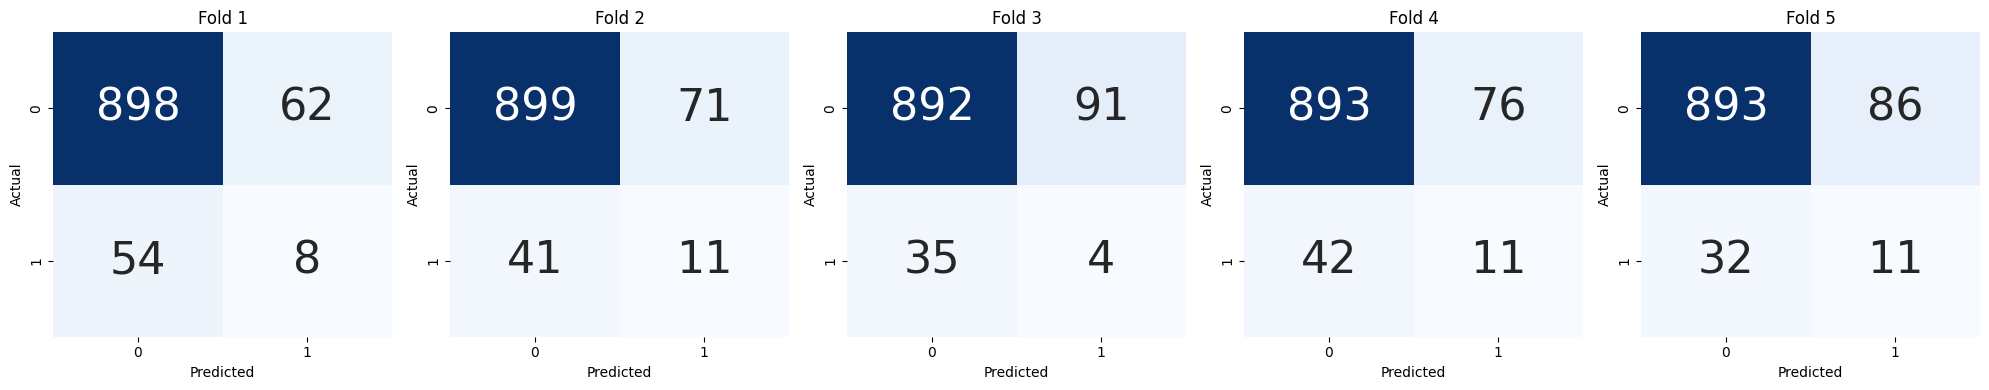

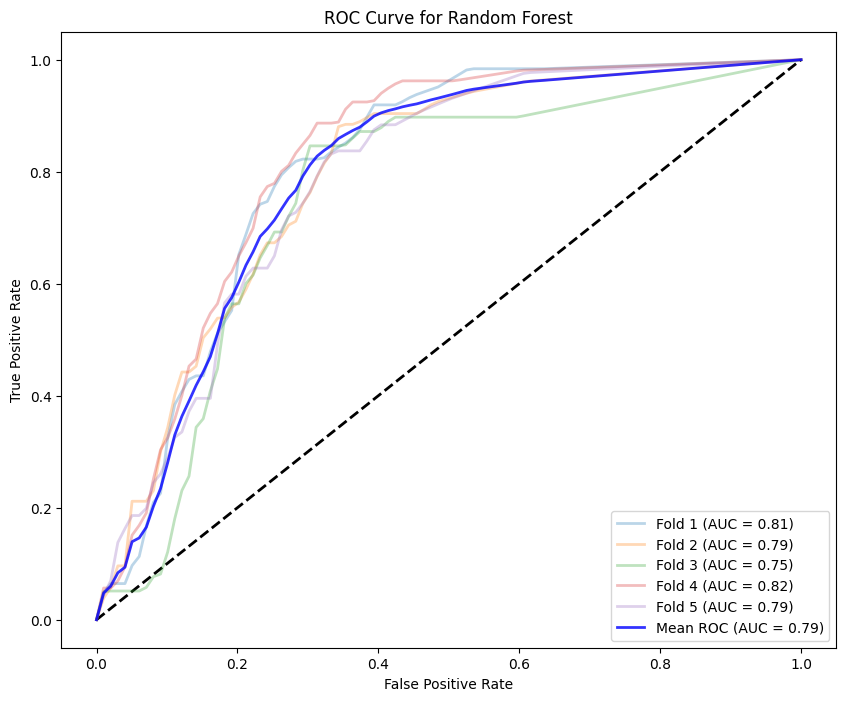

Training and evaluating Gradient Boosting...
Fold 1 Accuracy: 0.8062622309197651
Fold 1 F1 Score: 0.24427480916030533
Fold 2 Accuracy: 0.7935420743639922
Fold 2 F1 Score: 0.2037735849056604
Fold 3 Accuracy: 0.8043052837573386
Fold 3 F1 Score: 0.17355371900826447
Fold 4 Accuracy: 0.8101761252446184
Fold 4 F1 Score: 0.24806201550387597
Fold 5 Accuracy: 0.8238747553816047
Fold 5 F1 Score: 0.23728813559322032
Mean Accuracy: 0.8076320939334638
Mean F1 Score: 0.2213904528342653


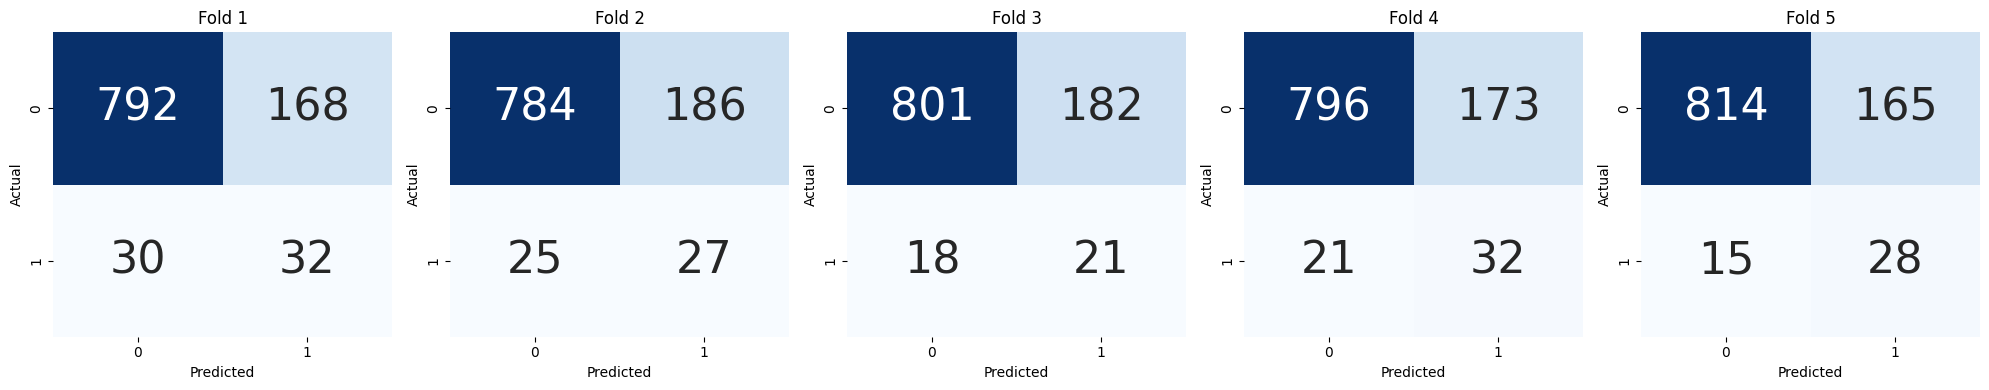

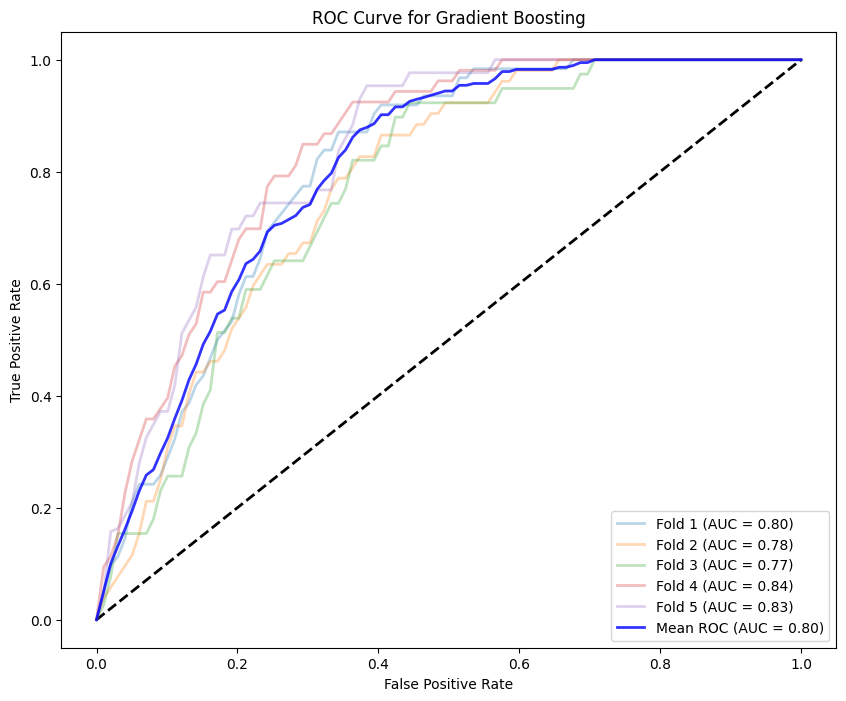

Training and evaluating AdaBoost...
Fold 1 Accuracy: 0.761252446183953
Fold 1 F1 Score: 0.2738095238095238
Fold 2 Accuracy: 0.7436399217221135
Fold 2 F1 Score: 0.19631901840490798
Fold 3 Accuracy: 0.764187866927593
Fold 3 F1 Score: 0.1660899653979239
Fold 4 Accuracy: 0.776908023483366
Fold 4 F1 Score: 0.25
Fold 5 Accuracy: 0.7788649706457925
Fold 5 F1 Score: 0.2206896551724138
Mean Accuracy: 0.7649706457925636
Mean F1 Score: 0.2213816325569539


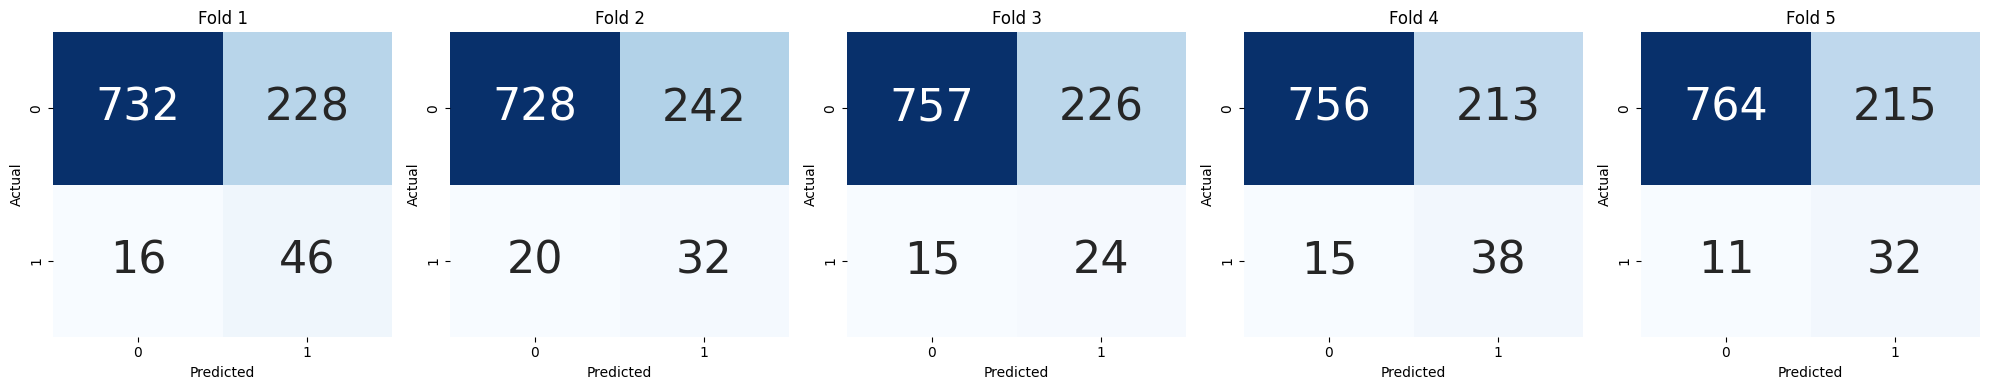

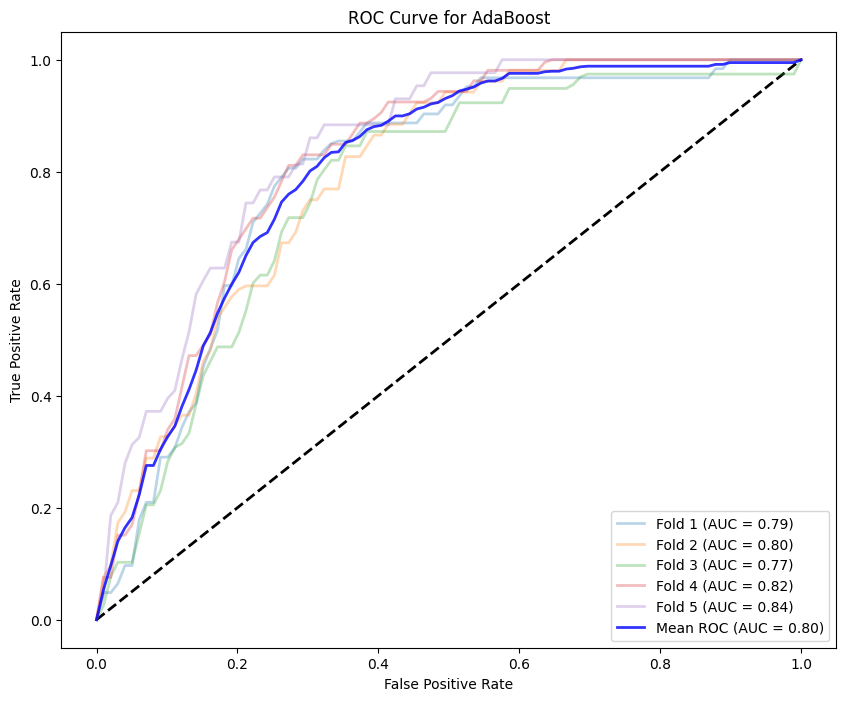

Training and evaluating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold 1 Accuracy: 0.7954990215264188
Fold 1 F1 Score: 0.21722846441947566
Fold 2 Accuracy: 0.8082191780821918
Fold 2 F1 Score: 0.22834645669291334
Fold 3 Accuracy: 0.8013698630136986
Fold 3 F1 Score: 0.13617021276595745
Fold 4 Accuracy: 0.7925636007827789
Fold 4 F1 Score: 0.2205882352941176
Fold 5 Accuracy: 0.8013698630136986
Fold 5 F1 Score: 0.19123505976095617
Mean Accuracy: 0.7998043052837573
Mean F1 Score: 0.19871368578668408


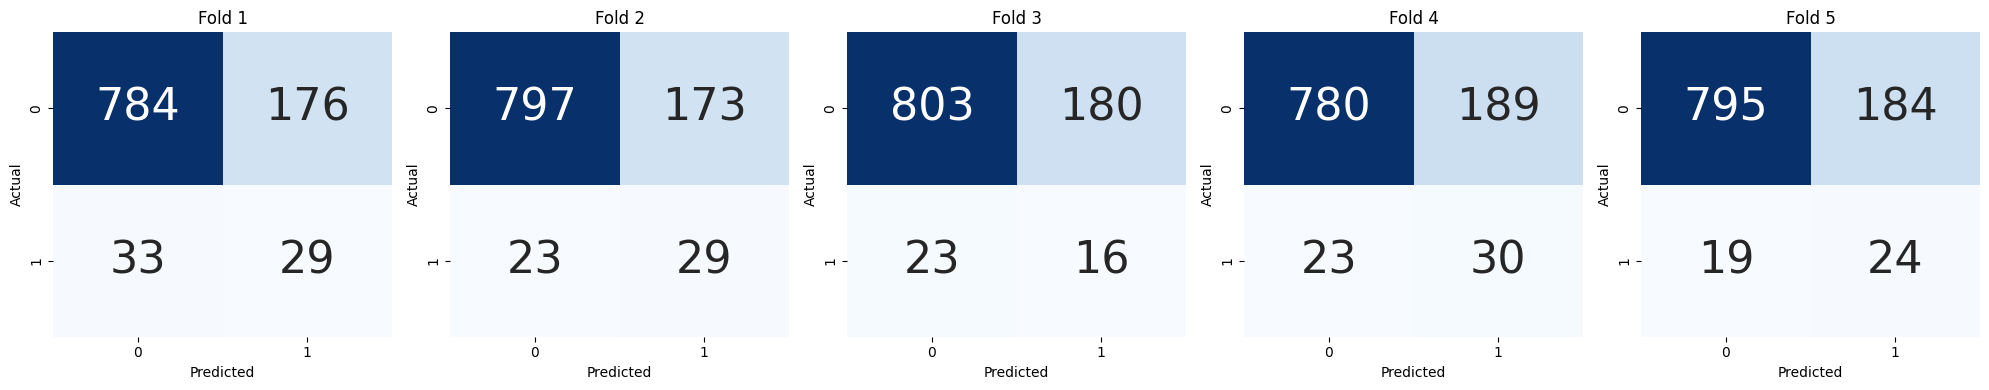

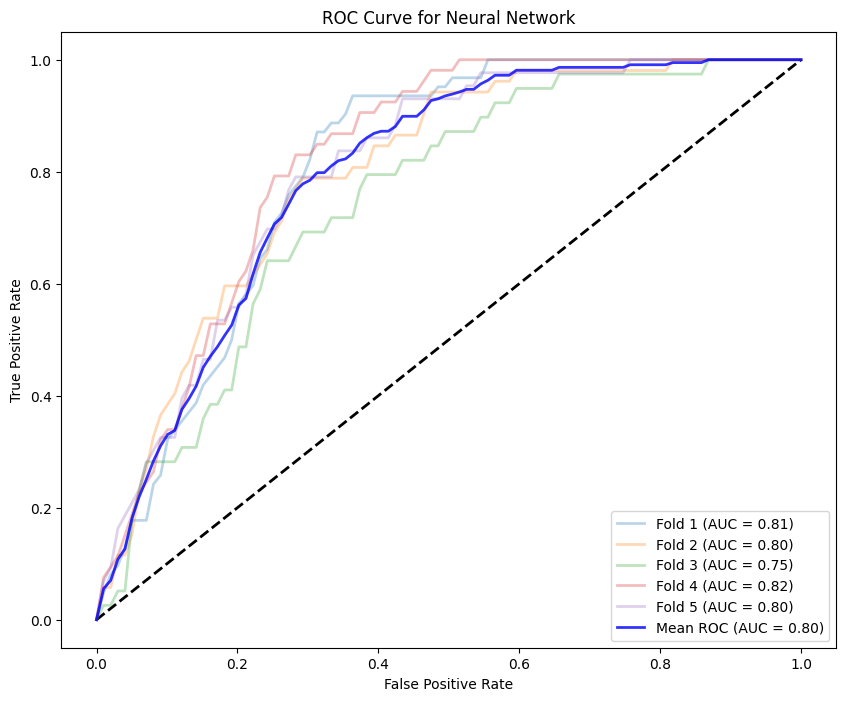

In [5]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 불러오기
data = pd.read_csv("pre_info2.csv")

# 'id' 열 제거
data = data.drop(columns=['id'])

# 범주형 변수를 더미 변수로 변환
data = pd.get_dummies(data, drop_first=True)

# # 독립 변수와 종속 변수를 분리합니다.
# X = data.drop(columns=['stroke'])
# y = data['stroke']


# 주요 특징들만 선택(상위 10개) 이 부분만 바꿔서 훈련
selected_features = ['age', 'bmi', 'avg_glucose_level','age_group_(70, 80]', 'hypertension','smoking_status_never smoked', 'gender_Male','Residence_type_Rural','gender_Female', 'heart_disease']
X = data[selected_features]
y = data['stroke']



# KFold 객체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델들 정의
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Neural Network", MLPClassifier(random_state=42))
]

# 각 모델별로 학습, 평가 수행
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    accuracies = []
    f1_scores = []
    conf_matrices = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # # SMOTE를 사용하여 학습 데이터를 오버샘플링
        # smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
        # X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Borderline-SMOTE를 사용하여 데이터를 오버샘플링
        borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
        X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

        # 모델 훈련
        model.fit(X_train_resampled, y_train_resampled)

        # 예측
        y_pred = model.predict(X_test)

        # 정확도 및 F1 점수 계산 및 저장
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1_scores.append(f1)

        # 혼동 행렬 계산 및 저장
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)

        # ROC 커브 계산
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # 각 fold에서의 정확도 및 F1 점수 출력
    for i, (accuracy, f1) in enumerate(zip(accuracies, f1_scores)):
        print(f"Fold {i+1} Accuracy: {accuracy}")
        print(f"Fold {i+1} F1 Score: {f1}")

    # 최종 평균 정확도 및 F1 점수 출력
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    print(f"Mean F1 Score: {np.mean(f1_scores)}")

    # 혼동 행렬 시각화
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, cm in enumerate(conf_matrices):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False, annot_kws={"size": 32})
        axes[i].set_title(f'Fold {i+1}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # ROC 커브 시각화
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    for i, (tpr, roc_auc) in enumerate(zip(tprs, aucs)):
        plt.plot(mean_fpr, tpr, lw=2, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
